In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import plot_confusion_matrix

In [17]:
# read data
df = pd.read_csv("median_phospho_data.csv")

# display(df.filter(regex="184A1", axis=0))
# display(df[df.cell_line== "184A1"])
# filter data and clean to prepare it for Support Vector Machine
df_copy = df
new_df = df[df["treatment"] == "full"]
types_df = pd.read_csv("subtypes.csv")
full_dataframe = new_df.set_index("cell_line").join(types_df.set_index("Cell line"))

luminal_cells = full_dataframe[full_dataframe["Type"] == "L"].fillna(0)
basal_cells = full_dataframe[full_dataframe["Type"] == "B"].fillna(0)
normal_cells = full_dataframe[full_dataframe["Type"] == "Normal"].fillna(0)
luminal_cell_names = luminal_cells.index
basal_cell_names = basal_cells.index
normal_cell_names = normal_cells.index
luminal_copy = luminal_cells
basal_copy = basal_cells
normal_copy = normal_cells
display(full_dataframe)
# set up data for training
drop_lst = ["treatment", "time", "cell_line", "Type", "ER", "PR", "HER2", "PI3K", "p53", "RAS"]
luminal_cells = luminal_cells.reset_index().drop(drop_lst, axis=1)
basal_cells = basal_cells.reset_index().drop(drop_lst,axis=1)
normal_cells = normal_cells.reset_index().drop(drop_lst, axis=1)

svm_data_bin = pd.concat([luminal_cells, basal_cells])

svm_data_bin = svm_data_bin.reset_index()
svm_data_bin = svm_data_bin.fillna(0)
svm_data_bin = svm_data_bin.drop("index", axis=1)

svm_labels_bin = list(np.zeros(len(luminal_cells))) + list(np.ones(len(basal_cells)))

luminal_centroid = luminal_cells.transpose().mean(axis=1)
basal_centroid = basal_cells.transpose().mean(axis=1)
normal_centroid = normal_cells.transpose().mean(axis=1)

all_labels = list(types_df["Cell line"])

full_sample_names = list(df[df["treatment"] == "full"]["cell_line"])

perturbs = df.treatment.unique()


,treatment,time,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,...,p.STAT1,p.STAT3,p.STAT5,Type,ER,PR,HER2,PI3K,p53,RAS
cell_line,,,,,,,,,,,,,,,,,,,,,
184A1,full,0.0,1.268450,3.011949,3.269844,2.971663,6.726300,3.876879,2.905013,3.089881,...,2.887623,1.565863,2.264294,Normal,NaN,NaN,NaN,NaN,NaN,NaN
184B5,full,0.0,0.644142,2.724148,1.992426,2.214774,6.145829,2.379644,2.210643,2.981967,...,2.412290,1.562300,2.227544,Normal,NaN,NaN,NaN,NaN,NaN,NaN
AU565,full,0.0,0.677910,1.779176,1.673790,1.759997,6.159892,3.368162,2.533022,NaN,...,2.551210,1.107368,2.433133,L,NaN,NaN,NaN,NaN,TP53_R175H,NaN
BT20,full,0.0,0.981176,2.298729,2.604696,2.357667,6.357916,3.449260,2.922381,4.431486,...,3.184696,2.611055,3.028543,B,neg,neg,neg,PIK3CA_P539R,TP53_K132Q,?
BT474,full,0.0,1.063666,2.434756,1.759334,3.102078,6.121343,2.168054,2.905236,4.173112,...,3.278507,1.167880,2.727995,L,pos,pos,pos,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UACC812,full,0.0,0.447033,1.912245,1.910090,2.156748,6.249708,2.524488,1.937317,2.966196,...,2.245525,2.340043,2.797592,L,pos,pos/neg,pos,NaN,NaN,NaN
UACC893,full,0.0,0.796624,1.779636,2.283681,2.579910,6.439663,3.187646,3.442570,3.084190,...,2.014526,0.790651,1.892180,L,neg,neg,pos,NaN,NaN,NaN
ZR751,full,0.0,0.521518,1.595210,2.320011,2.379614,6.058985,3.423700,2.676131,2.903183,...,2.577450,2.221809,2.953896,L,pos,pos/neg,neg,NaN,NaN,NaN


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


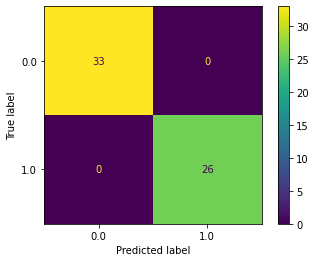

In [18]:
# train Support Vector Machine
from sklearn import svm
from sklearn.svm import SVC
svc = SVC(kernel="linear", C=100)
svc.fit(svm_data_bin, svm_labels_bin)
plot_confusion_matrix(svc,svm_data_bin,svm_labels_bin)

In [19]:
# Calculate State Transition Vector and Normal to Hyperplane
from scipy import linalg
from math import degrees

hyperplane_normal = svc.coef_[0]/linalg.norm(svc.coef_[0])

# distance between luminal and basal centroids (cSTAR eq. 1) -> STV
state_vec = (basal_centroid - luminal_centroid)/linalg.norm(luminal_centroid - basal_centroid)


norm_stv_df = pd.DataFrame(state_vec,index=svm_data_bin.columns,columns=['STV'])
norm_stv_df.insert(0,'norm_vec', hyperplane_normal)

norm_stv_df.sort_values(by='norm_vec').to_csv('STV_Luminal_Basal.csv')

# display(norm_stv_df.sort_values(by='norm_vec'))
# np.dot(norm_stv_df['norm_vec'],norm_stv_df['s_vec'])

In [20]:

df = df.reset_index()
df["cell_line"] += "_" + df["time"].astype(str) + "_" + df["treatment"]
df = df.set_index("cell_line")
df = df.fillna(0)
types_df = types_df.set_index("Cell line")
# types_df

In [21]:
import statistics
# make intercept negative since we wish to get it on "the other side"
H_CONSTANT = - svc.intercept_[0]/linalg.norm(svc.coef_[0])

def extract_cell_line(sample):
    return sample[:sample.index("_")]


cell_line_dpds = {label: [] for label in all_labels}
df = df.drop(["index", "treatment", "time"], axis=1)

Comb_DPD_vals = []
for smpl in df.index:
    print(smpl)
    cell_line = smpl
    if "HCC38" in smpl or "HCC70" in smpl:
        continue
    
    # DPD -> cSTAR paper equation 8
    n = norm_stv_df['norm_vec']
    s = norm_stv_df["STV"]
    DPD_val = - (H_CONSTANT - np.dot(df.loc[smpl],n))/np.dot(n,s)
    cell_line_dpds[extract_cell_line(cell_line)].append(DPD_val)
    
# print(cell_line_dpds)    
# mean_dpd = {label: statistics.mean(val) for label, val in cell_line_dpds.items()}


# display(types_df)

types_df['DPD'] = "" 

for label, val in cell_line_dpds.items():
    types_df.at[label, 'DPD'] = np.mean(val)


# display(types_df)

types_df.to_csv('cell_line_and_subtype_test.csv')

184A1_0.0_EGF
184A1_5.5_EGF
184A1_7.0_EGF
184A1_9.0_EGF
184A1_13.0_EGF
184A1_17.0_EGF
184A1_23.0_EGF
184A1_30.0_EGF
184A1_40.0_EGF
184A1_60.0_EGF
184A1_0.0_full
184A1_0.0_iEGFR
184A1_7.0_iEGFR
184A1_9.0_iEGFR
184A1_13.0_iEGFR
184A1_17.0_iEGFR
184A1_40.0_iEGFR
184A1_60.0_iEGFR
184A1_0.0_iMEK
184A1_7.0_iMEK
184A1_9.0_iMEK
184A1_13.0_iMEK
184A1_17.0_iMEK
184A1_40.0_iMEK
184A1_60.0_iMEK
184A1_0.0_iPI3K
184A1_7.0_iPI3K
184A1_9.0_iPI3K
184A1_13.0_iPI3K
184A1_17.0_iPI3K
184A1_40.0_iPI3K
184A1_60.0_iPI3K
184A1_0.0_iPKC
184A1_7.0_iPKC
184A1_9.0_iPKC
184A1_13.0_iPKC
184A1_17.0_iPKC
184A1_40.0_iPKC
184A1_60.0_iPKC
184B5_0.0_EGF
184B5_5.5_EGF
184B5_7.0_EGF
184B5_9.0_EGF
184B5_13.0_EGF
184B5_17.0_EGF
184B5_23.0_EGF
184B5_30.0_EGF
184B5_40.0_EGF
184B5_60.0_EGF
184B5_0.0_full
184B5_0.0_iEGFR
184B5_7.0_iEGFR
184B5_9.0_iEGFR
184B5_13.0_iEGFR
184B5_17.0_iEGFR
184B5_40.0_iEGFR
184B5_60.0_iEGFR
184B5_0.0_iPI3K
184B5_7.0_iPI3K
184B5_9.0_iPI3K
184B5_13.0_iPI3K
184B5_17.0_iPI3K
184B5_40.0_iPI3K
184B5_60.0_iP

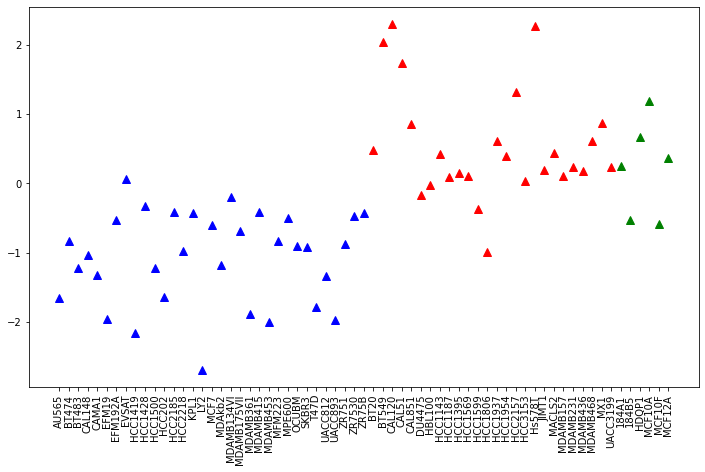

In [9]:
import matplotlib.pyplot as plt

# 2D visualization for binary classification
binary_dpd_vals = types_df["DPD"]


fig = plt.figure(figsize=(12,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)

# making ticks readable
plt.xticks(rotation='vertical')

# issues with getting an appropriate 1D plot
ax.plot(binary_dpd_vals.loc[luminal_cell_names],'^',color='blue',label='luminal',ms=8)
ax.plot(binary_dpd_vals.loc[basal_cell_names],'^',color='red',label='basal',ms=8)
ax.plot(binary_dpd_vals.loc[normal_cell_names],'^',color='green',label='normal',ms=8)

plt.show()


In [10]:
# multi svm training data

multi_svm_training = pd.concat([luminal_cells,basal_cells, normal_cells])
multi_classification = list(np.zeros(len(luminal_cells))) + list(np.ones(len(basal_cells))) + list(np.full(len(normal_cells),2))

multi_svm_training = multi_svm_training.reset_index().fillna(0).drop("index", axis=1)
# multi_svm_training = multi_svm_training.drop(["PR", "HER2", "PI3K", "p53", "RAS", "Type", "ER", "treatment", "time"], axis=1)



,b.CATENIN,cleavedCas,CyclinB,GAPDH,IdU,Ki.67,p.4EBP1,p.Akt.Ser473.,p.AKT.Thr308.,p.AMPK,...,p.PDPK1,p.PLCg2,p.RB,p.S6,p.S6K,p.SMAD23,p.SRC,p.STAT1,p.STAT3,p.STAT5
0,0.677910,1.779176,1.673790,1.759997,6.159892,3.368162,2.533022,0.000000,2.116985,2.549938,...,1.040180,0.000000,5.587673,0.000000,2.531707,1.647424,1.839102,2.551210,1.107368,2.433133
1,1.063666,2.434756,1.759334,3.102078,6.121343,2.168054,2.905236,4.173112,2.802465,2.508447,...,2.185061,2.172251,4.202805,6.846955,2.035517,1.780411,2.359247,3.278507,1.167880,2.727995
2,0.796624,1.588045,1.968335,2.244023,5.968479,2.542089,2.245383,3.538439,2.022778,3.263898,...,1.548628,1.851354,3.044003,5.756088,2.066058,1.447193,2.560634,3.132175,3.348869,2.698918
3,1.245810,1.805119,2.649700,3.482292,5.679523,3.643943,4.162734,5.100270,2.752224,2.563220,...,1.967921,2.628222,2.975085,4.516129,2.200839,1.562807,2.732056,2.928218,1.387870,1.894472
4,0.680420,1.919718,1.937110,2.709673,5.923626,3.306433,3.076086,3.677304,2.256902,2.228618,...,1.675660,2.104837,5.920553,6.877702,1.580071,1.539478,1.757436,2.797769,1.217047,2.439276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0.644142,2.724148,1.992426,2.214774,6.145829,2.379644,2.210643,2.981967,2.273421,3.431763,...,2.187006,1.896927,5.049717,4.743696,2.058578,2.113998,2.192451,2.412290,1.562300,2.227544
61,0.691324,2.429347,3.227090,2.396314,6.946204,3.872689,3.274965,3.869111,2.230546,3.264025,...,1.890161,2.103257,3.158776,5.004745,2.186853,1.823726,2.886019,3.118439,1.805449,2.705980
62,0.827343,2.721718,2.770243,2.559525,6.197777,4.654331,2.484185,2.774590,2.375213,3.286100,...,2.050934,1.366459,6.002857,6.226762,1.675809,1.899094,1.875653,2.853999,1.685630,1.979678
63,0.926847,3.086199,3.397483,3.183370,6.264556,4.405243,3.053248,3.197812,2.679626,2.931494,...,2.357047,1.721135,6.441925,6.291298,2.446044,2.274946,2.148126,2.980237,2.261184,2.506966


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


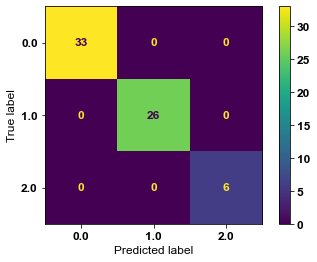

In [11]:
# multi svm
# changing strictness parameter to improve separation

display(multi_svm_training)
svc_multi = SVC(kernel='linear',C=100)#,decision_function_shape='ovo')
svc_multi.fit(multi_svm_training,multi_classification)


# now let's check how well we have separated
plot_confusion_matrix(svc_multi,multi_svm_training,multi_classification)
# with C=100 the consion matrix is diagonal
# if C=1 the amount of misclassified cells with be small but non zero



In [12]:
#calculate norm vec and coeffs for multi svm

b_coeff_1 = - svc_multi.intercept_[0]#/linalg.norm(svc_multi.coef_[0])
norm_vec_1 = svc_multi.coef_[0]#/linalg.norm(svc_multi.coef_[0])
b_coeff_2 = - svc_multi.intercept_[1]#/linalg.norm(svc_multi.coef_[1])
norm_vec_2 = svc_multi.coef_[1]#/linalg.norm(svc_multi.coef_[1])
b_coeff_3 = - svc_multi.intercept_[2]#/linalg.norm(svc_multi.coef_[2])
norm_vec_3 = svc_multi.coef_[2]#/linalg.norm(svc_multi.coef_[2])

angle_1 = (np.arccos(np.dot(norm_vec_1,norm_vec_2)/(linalg.norm(norm_vec_1)*linalg.norm(norm_vec_2)))/np.pi)*180
angle_2 = (np.arccos(np.dot(norm_vec_2,norm_vec_3)/(linalg.norm(norm_vec_2)*linalg.norm(norm_vec_3)))/np.pi)*180
angle_3 = (np.arccos(np.dot(norm_vec_1,norm_vec_3)/(linalg.norm(norm_vec_1)*linalg.norm(norm_vec_3)))/np.pi)*180
print(angle_1)
print(angle_2)
print(angle_3)
# vectors 1 and 3 are nearly orthogonal, cool!

norm_vec_e_comb_df = pd.DataFrame(norm_vec_3/linalg.norm(norm_vec_3),index=multi_svm_training.columns,columns=['norm_vec_3'])
norm_vec_e_comb_df.insert(0,'norm_vec_2',norm_vec_2/linalg.norm(norm_vec_2))
norm_vec_e_comb_df.insert(0,'norm_vec_1',norm_vec_1/linalg.norm(norm_vec_1))
norm_vec_e_comb_df.sort_values(by='norm_vec_1',ascending=False)


67.76629024975159
45.992747023910084
96.60189452224266


,norm_vec_1,norm_vec_2,norm_vec_3
p.BTK,0.404901,0.171469,-0.031069
p.MAP2K3,0.208480,-0.010712,-0.040356
p.p90RSK,0.180298,0.259495,0.139153
p.RB,0.172977,0.236532,0.043311
p.PDPK1,0.159161,-0.126318,-0.219280
p.MAPKAPK2,0.137052,0.057111,-0.038323
p.MEK,0.104441,-0.207843,-0.360323
p.H3,0.091454,-0.167614,-0.068126
p.SRC,0.090288,-0.158820,-0.118614
p.STAT5,0.074467,-0.097105,-0.012888


In [13]:
# calculate dpds for multi SVM for ALL cell lines

cell_line_dpds = {label: [[],[],[]] for label in all_labels}

for smpl in df.index:
    if "HCC38" in smpl or "HCC70" in smpl:
        continue
    cell_line = smpl
    DPD_val_1 =   - (b_coeff_1 - np.dot(df.loc[smpl],norm_vec_1))
    DPD_val_2 =   - (b_coeff_2 - np.dot(df.loc[smpl],norm_vec_2))
    DPD_val_3 =   - (b_coeff_3 - np.dot(df.loc[smpl],norm_vec_3))
    cell_line_dpds[extract_cell_line(cell_line)][0].append(DPD_val_1)
    cell_line_dpds[extract_cell_line(cell_line)][1].append(DPD_val_2)
    cell_line_dpds[extract_cell_line(cell_line)][2].append(DPD_val_3)
        
mean_dpd_1 = {label: statistics.mean(val[0]) for label, val in cell_line_dpds.items()}
mean_dpd_2 = {label: statistics.mean(val[1]) for label, val in cell_line_dpds.items()}
mean_dpd_3 = {label: statistics.mean(val[2]) for label, val in cell_line_dpds.items()}


copy = types_df.copy()
copy["DPD_1"] = ""
copy["DPD_2"] = ""
copy["DPD_3"] = ""

for label, val in mean_dpd_1.items():
    print(label, val)
    copy.at[label, 'DPD_1'] = val

for label, val in mean_dpd_2.items():
    print(label)
    copy.at[label, 'DPD_2'] = val
    
for label, val in mean_dpd_3.items():
    print(label)
    copy.at[label, 'DPD_3'] = val
    
display(copy)


184A1 -0.592971042872695
184B5 1.2072762202878629
AU565 3.841982455918217
BT20 -1.1209912362689147
BT474 1.9258677415297287
BT483 2.81936392257636
BT549 -4.738675469742725
CAL120 -5.325112266663213
CAL148 2.4002609811963738
CAL51 -4.028857449621877
CAL851 -1.9954180237726118
CAMA1 3.051207664328718
DU4475 0.3868519889489938
EFM19 4.5362855066697865
EFM192A 1.2141997260521677
EVSAT -0.15556210187829178
HBL100 0.04253054857363836
HCC1143 -0.9996046171889503
HCC1187 -0.20556397485659955
HCC1395 -0.35376857243277765
HCC1419 4.994193783185765
HCC1428 0.7548505858288073
HCC1500 2.840327422214102
HCC1569 -0.23932253745759083
HCC1599 0.8422331545985108
HCC1806 2.2834782869353725
HCC1937 -1.416314225543854
HCC1954 -0.901408576420856
HCC202 3.7937417448980564
HCC2157 -3.046387988647103
HCC2185 0.9640455214903162
HCC2218 2.2751335502420527
HCC3153 -0.09567525033493209
HDQP1 -1.5364340066006703
Hs578T -5.278700035913309
JIMT1 -0.4554594114767845
KPL1 1.0005195902688033
LY2 6.242870968869282
MACLS2

,Type,ER,PR,HER2,PI3K,p53,RAS,DPD,DPD_1,DPD_2,DPD_3
Cell line,,,,,,,,,,,
184A1,Normal,NaN,NaN,NaN,NaN,NaN,NaN,0.255821,-0.592971,-1.117486,0.035458
184B5,Normal,NaN,NaN,NaN,NaN,NaN,NaN,-0.520846,1.207276,-1.147316,-0.396632
AU565,L,NaN,NaN,NaN,NaN,TP53_R175H,NaN,-1.657519,3.841982,1.801184,1.604877
BT20,B,neg,neg,neg,PIK3CA_P539R,TP53_K132Q,?,0.483621,-1.120991,0.574288,1.319584
BT474,L,pos,pos,pos,NaN,NaN,NaN,-0.830863,1.925868,0.873636,0.685484
...,...,...,...,...,...,...,...,...,...,...,...
UACC812,L,pos,pos/neg,pos,NaN,NaN,NaN,-1.337481,3.100163,1.041484,1.54155
UACC893,L,neg,neg,pos,NaN,NaN,NaN,-1.965336,4.555475,2.555333,1.672842
ZR751,L,pos,pos/neg,neg,NaN,NaN,NaN,-0.877516,2.034005,1.46086,2.381279


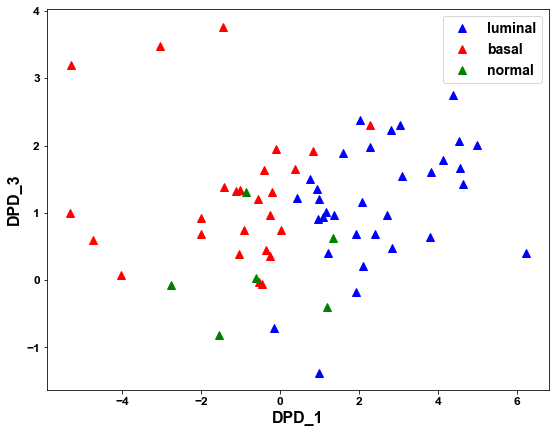

In [14]:
# 2D visualization fpr multi svm
dpd_vals = copy[["DPD_1", "DPD_2", "DPD_3"]]

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)


xax=0
yax=2

ax.plot(dpd_vals.loc[luminal_cell_names].iloc[:,xax],dpd_vals.loc[luminal_cell_names].iloc[:,yax],'^',color='blue',label='luminal',ms=8)
ax.plot(dpd_vals.loc[basal_cell_names].iloc[:,xax],dpd_vals.loc[basal_cell_names].iloc[:,yax],'^',color='red',label='basal',ms=8)
ax.plot(dpd_vals.loc[normal_cell_names].iloc[:,xax],dpd_vals.loc[normal_cell_names].iloc[:,yax],'^',color='green',label='normal',ms=8)

ax.set_xlabel('DPD_1',**fontLabel)
ax.set_ylabel('DPD_3',**fontLabel)


ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.show()



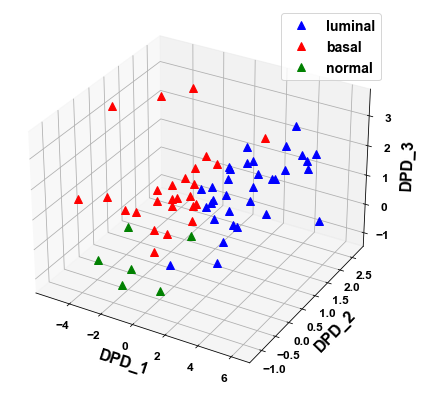

In [15]:
# 3D visualization

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)


ax.plot(dpd_vals.loc[luminal_cell_names].iloc[:,0],dpd_vals.loc[luminal_cell_names].iloc[:,1],dpd_vals.loc[luminal_cell_names].iloc[:,2],'^',color='blue',label='luminal',ms=8)
ax.plot(dpd_vals.loc[basal_cell_names].iloc[:,0],dpd_vals.loc[basal_cell_names].iloc[:,1],dpd_vals.loc[basal_cell_names].iloc[:,2],'^',color='red',label='basal',ms=8)
ax.plot(dpd_vals.loc[normal_cell_names].iloc[:,0],dpd_vals.loc[normal_cell_names].iloc[:,1],dpd_vals.loc[normal_cell_names].iloc[:,2],'^',color='green',label='normal',ms=8)



ax.set_xlabel('DPD_1',**fontLabel)
ax.set_ylabel('DPD_2',**fontLabel)
ax.set_zlabel('DPD_3',**fontLabel)


ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.show()



In [16]:
DPDs_3D = pd.DataFrame(np.zeros((len(df.T.columns),3)),index=df.T.columns,columns=['DPD_1','DPD_2','DPD_3'])

for smpl in df.index:
    
#     print(- (b_coeff_1 - np.dot(df.loc[smpl],norm_vec_1)))
    DPDs_3D.at[smpl,'DPD_1'] = - (b_coeff_1 - np.dot(df.loc[smpl],norm_vec_1))
    DPDs_3D.at[smpl,'DPD_2'] = - (b_coeff_2 - np.dot(df.loc[smpl],norm_vec_2))
    DPDs_3D.at[smpl,'DPD_3'] = - (b_coeff_3 - np.dot(df.loc[smpl],norm_vec_3))
        
DPDs_3D_full = DPDs_3D.filter(regex="_full", axis=0)
DPDs_3D_full["real_col"] = DPDs_3D_full.index.str[:-9]
DPDs_3D_full = DPDs_3D_full.set_index("real_col")

/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1999/2761714044.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPDs_3D_full["real_col"] = DPDs_3D_full.index.str[:-9]


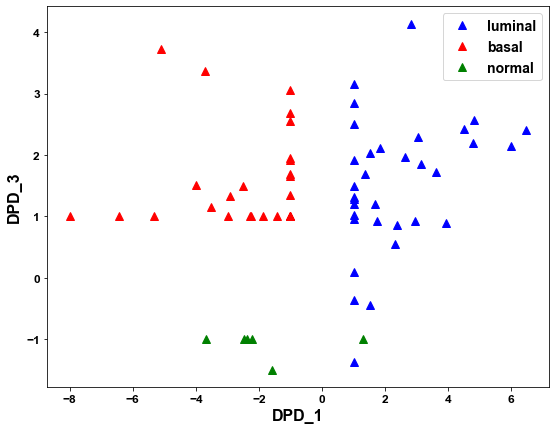

In [17]:
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)


xax=0
yax=2



ax.plot(DPDs_3D_full.loc[luminal_cell_names].iloc[:,xax],DPDs_3D_full.loc[luminal_cell_names].iloc[:,yax],'^',color='blue',label='luminal',ms=8)
ax.plot(DPDs_3D_full.loc[basal_cell_names].iloc[:,xax],DPDs_3D_full.loc[basal_cell_names].iloc[:,yax],'^',color='red',label='basal',ms=8)
ax.plot(DPDs_3D_full.loc[normal_cell_names].iloc[:,xax],DPDs_3D_full.loc[normal_cell_names].iloc[:,yax],'^',color='green',label='normal',ms=8)


ax.set_xlabel('DPD_1',**fontLabel)
ax.set_ylabel('DPD_3',**fontLabel)


ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.show()


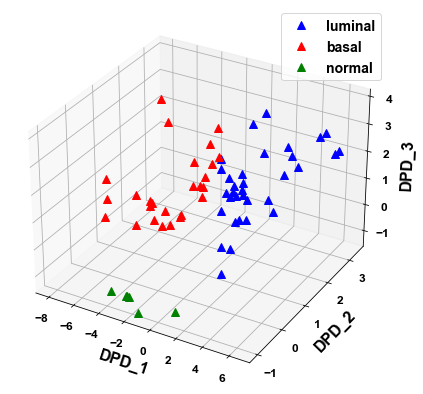

In [18]:
# 3D visualization
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)


ax.plot(DPDs_3D_full.loc[luminal_cell_names].iloc[:,0],DPDs_3D_full.loc[luminal_cell_names].iloc[:,1],DPDs_3D_full.loc[luminal_cell_names].iloc[:,2],'^',color='blue',label='luminal',ms=8)
ax.plot(DPDs_3D_full.loc[basal_cell_names].iloc[:,0],DPDs_3D_full.loc[basal_cell_names].iloc[:,1],DPDs_3D_full.loc[basal_cell_names].iloc[:,2],'^',color='red',label='basal',ms=8)
ax.plot(DPDs_3D_full.loc[normal_cell_names].iloc[:,0],DPDs_3D_full.loc[normal_cell_names].iloc[:,1],DPDs_3D_full.loc[normal_cell_names].iloc[:,2],'^',color='green',label='normal',ms=8)



ax.set_xlabel('DPD_1',**fontLabel)
ax.set_ylabel('DPD_2',**fontLabel)
ax.set_zlabel('DPD_3',**fontLabel)


ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.show()



/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


50.79878822910363


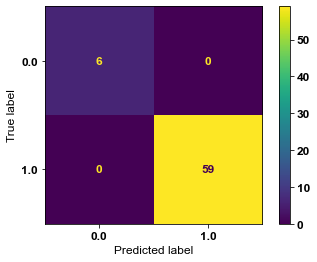

In [19]:
svc_canc = SVC(kernel='linear',C=100)
svc_canc.fit(pd.concat([luminal_cells,basal_cells,normal_cells]).fillna(0), list(np.ones(len(luminal_cells))) + list(np.ones(len(basal_cells))) + list(np.zeros(len(normal_cells))))

b_coeff_canc = - svc_canc.intercept_[0]/linalg.norm(svc_canc.coef_[0])
# b_coeff_canc = svc_canc.intercept_[0]/linalg.norm(svc_canc.coef_[0])

norm_vec_canc = svc_canc.coef_[0]/linalg.norm(svc_canc.coef_[0])
canc_centroid = (basal_centroid + luminal_centroid)/2.0
s_vec_canc = (canc_centroid - normal_centroid)/linalg.norm(canc_centroid - normal_centroid)

angle_canc = (np.arccos(np.dot(norm_vec_canc,s_vec_canc))/np.pi)*180
print(angle_canc)

plot_confusion_matrix(svc_canc,pd.concat([luminal_cells,basal_cells,normal_cells]).fillna(0), list(np.ones(len(luminal_cells))) + list(np.ones(len(basal_cells))) + list(np.zeros(len(normal_cells))))

In [20]:
norm_vec_2D_df = pd.DataFrame(np.array([norm_vec_canc,np.array(s_vec_canc),norm_vec_train,np.array(s_vec_train)]),columns=luminal_cells.columns,index=['norm_vec_canc','s_vec_canc','norm_vec_LB','s_vec_LB']).T
norm_vec_2D_df.to_csv('STV_2D.csv')
norm_vec_2D_df

,norm_vec_canc,s_vec_canc,norm_vec_LB,s_vec_LB
b.CATENIN,0.131304,-0.010723,0.046884,0.006244
cleavedCas,-0.329216,-0.356425,-0.019825,-0.001486
CyclinB,-0.162507,-0.267687,0.119155,0.240307
GAPDH,0.155329,0.003149,0.057626,0.098543
IdU,-0.038057,-0.106980,0.214310,0.255112
Ki.67,-0.090930,-0.169056,0.239274,0.321323
p.4EBP1,0.042199,0.073994,-0.042644,-0.052987
p.Akt.Ser473.,-0.187195,0.010185,-0.057787,0.234242
p.AKT.Thr308.,-0.087050,-0.086110,0.241457,-0.010454
p.AMPK,-0.021344,-0.121551,-0.060952,0.148380


In [21]:
DPDs_2D = pd.DataFrame(np.zeros((len(df.T.columns),2)),index=df.T.columns,columns=['DPD_canc','DPD_LB'])

for smpl in df.T.columns:
    DPDs_2D.at[smpl,'DPD_canc'] =   - (b_coeff_canc - np.dot(df.loc[smpl],norm_vec_2D_df['norm_vec_canc']))/np.dot(norm_vec_2D_df['norm_vec_canc'],norm_vec_2D_df['s_vec_canc'])
    DPDs_2D.at[smpl,'DPD_LB'] =   - (b_coeff_train - np.dot(df.loc[smpl],norm_vec_2D_df['norm_vec_LB']))/np.dot(norm_vec_2D_df['norm_vec_LB'],norm_vec_2D_df['s_vec_LB'])


DPDs_2D_full = DPDs_2D.filter(regex="_full", axis=0)
DPDs_2D_full.to_csv('DPDs_2D_full.csv')
# DPDs_2D_full
# full_sample_names
DPDs_2D_full["real_col"] = DPDs_2D_full.index.str[:-9]
DPDs_2D_full = DPDs_2D_full.set_index("real_col")

/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1999/1571747812.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPDs_2D_full["real_col"] = DPDs_2D_full.index.str[:-9]


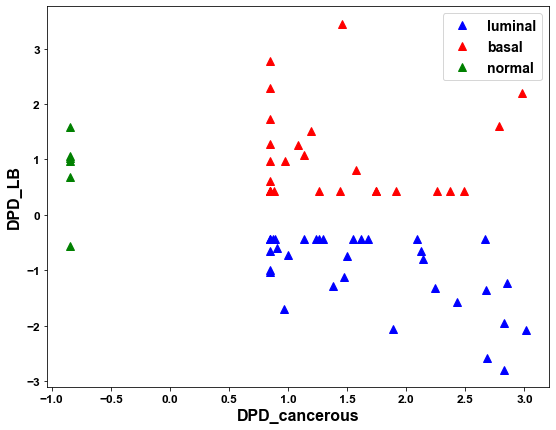

In [22]:

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)

ax.plot(DPDs_2D_full.loc[luminal_copy.T.columns].iloc[:,0],DPDs_2D_full.loc[luminal_copy.T.columns].iloc[:,1],'^',color='blue',label='luminal',ms=8)
ax.plot(DPDs_2D_full.loc[basal_copy.T.columns].iloc[:,0],DPDs_2D_full.loc[basal_copy.T.columns].iloc[:,1],'^',color='red',label='basal',ms=8)
ax.plot(DPDs_2D_full.loc[normal_copy.T.columns].iloc[:,0],DPDs_2D_full.loc[normal_copy.T.columns].iloc[:,1],'^',color='green',label='normal',ms=8)

ax.set_xlabel('DPD_cancerous',**fontLabel)
ax.set_ylabel('DPD_LB',**fontLabel)


ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.show()



In [23]:
angle_n = (np.arccos(np.dot(norm_vec_2D_df['norm_vec_canc'],norm_vec_2D_df['norm_vec_LB']))/np.pi)*180
angle_s = (np.arccos(np.dot(norm_vec_2D_df['s_vec_canc'],norm_vec_2D_df['s_vec_LB']))/np.pi)*180
print(angle_n)
print(angle_s)

93.12016972959519
99.26814269717843


In [24]:
# # getting module outputs
# df_copy_og = pd.read_csv("median_phospho_data.csv")


# for line in df_copy_og.cell_line.unique():
#     if line != "MDAMB231":
#         continue
#     try:
#         print(f"{line}")
#         module_dict = {
#             "EGF" : [],
#             "iMEK" : [],
#             "iPKC" : [],
#             "iEGFR" : [],
#             "iPI3K" : []
#         }

#         df_copy = df_copy_og[df_copy_og["treatment"] != "full"]
#         df_copy = df_copy[df_copy["cell_line"] == line]

#         df_copy = df_copy.drop("cell_line",axis=1)

#         proteins = list(df_copy.columns)
#         proteins.remove("treatment")
#         proteins.remove("time")
#         proteins.remove("b.CATENIN")
#         p_dict = {i:module_dict for i in proteins}

        
#         for p in p_dict.keys():
            
#             vmax = 0
#             marker = ""
#             for module in module_dict.keys():
#                 if module == "iPI3K":
#                     continue
#                 # print(f"{module}: ")
#                 p_df = df_copy.T.loc[["time", "treatment", p], :]
#                 p_df = p_df.T[p_df.T["treatment"] == module]


#                 # a = p_df.loc[p_df.time==40.0, p].values[0]
#                 b = p_df.loc[p_df.time==60.0, p].values[0]
#                 # print(fold)
#                 module_dict[module].append({p : b})
#         # print(p_dict)



#         for p in module_dict.keys():
#             print(f"{p} module output is: ")
#             mn = 1
#             for m in module_dict[p]:
#                 mn = m[list(m.keys())[0]] if m[list(m.keys())[0]] < mn else mn

#             print(mn)

#             for m in module_dict[p]:
#                 if m[list(m.keys())[0]] == mn:
#                     print(m)
#     except:
#         print("error")
#         continue




In [25]:
# generate r_ij values for matrices

modules_df = pd.read_excel("BMRA_modules.xlsx")
modules_df = modules_df.set_index("Module_name").drop("EGF")
# format outputs as are in dataframe
outputs = modules_df.Output
output_lst = [s.replace("-", ".") for s in list(outputs)]
output_lst[-1] = "p.GSK3b"
output_lst[1] = "p.Akt.Ser473."

In [26]:
# md7_df = df_copy_og[df_copy_og.cell_line == "MDAMB157"]
# md7_df = md7_df[md7_df.time == 60.0]
# display(md7_df)


# arr = []
# for p_ in md7_df:
#     if p_ in ["cell_line", "treatment", "time"]:
#         continue
#     arr.append(list(md7_df[p_])[0])
#     # print(p_, arr[-1])
# # md7_df.columns
# min(arr)

# # md7_df = md7_df[md7_df.treatment == "EGF"]
# # md7_df["IdU"]
# md7_df.to_csv("test.csv")

In [27]:
# def create_rij_values(i,j):
# df[df.treatment == "full"]
mod_df = df_copy[df_copy.treatment == "full"]
mod_df = mod_df.drop(output_lst, axis=1)



In [28]:
luminal_mod = mod_df.loc[mod_df["cell_line"].isin(luminal_cell_names)]
basal_mod = mod_df.loc[mod_df["cell_line"].isin(basal_cell_names)]
normal_mod = mod_df.loc[mod_df["cell_line"].isin(normal_cell_names)]

mod_drop_lst = ["treatment", "time", "cell_line", "index"]
luminal_mod = luminal_mod.reset_index().drop(mod_drop_lst, axis=1)
basal_mod = basal_mod.reset_index().drop(mod_drop_lst,axis=1)
normal_mod = normal_mod.reset_index().drop(mod_drop_lst, axis=1)

lb_data_mod = pd.concat([luminal_mod, basal_mod])

lb_data_mod = lb_data_mod.reset_index().fillna(0)
lb_data_mod = lb_data_mod.drop("index", axis=1)

lb_labels_mod = list(np.zeros(len(luminal_mod))) + list(np.ones(len(basal_mod)))

canc_data_mod = pd.concat([lb_data_mod, normal_mod]).fillna(0)
canc_labels_mod = list(np.zeros(len(luminal_mod) + len(basal_mod))) + list(np.ones(len(normal_mod)))

luminal_centroid_mod = luminal_mod.transpose().mean(axis=1)
basal_centroid_mod = basal_mod.transpose().mean(axis=1)
normal_centroid_mod = normal_mod.transpose().mean(axis=1)




/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


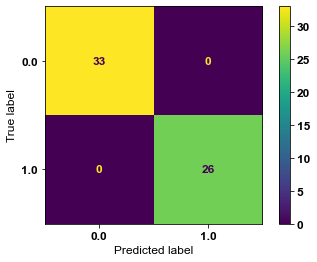

In [29]:
# Luminal vs Basal Separation
svc_mod = SVC(kernel="linear", C=100)
svc_mod.fit(lb_data_mod, lb_labels_mod)
plot_confusion_matrix(svc_mod, lb_data_mod, lb_labels_mod)

In [30]:
b_coeff_LB_mod = - svc_mod.intercept_[0]/linalg.norm(svc_mod.coef_[0])
norm_vec_LB_mod = svc_mod.coef_[0]/linalg.norm(svc_mod.coef_[0])
s_vec_LB_mod = (basal_centroid_mod - luminal_centroid_mod)/linalg.norm(luminal_centroid_mod - basal_centroid_mod)

angle_train = (np.arccos(np.dot(norm_vec_LB_mod,s_vec_LB_mod))/np.pi)*180
print(angle_train)

s_vec_norm_LB_df = pd.DataFrame(s_vec_LB_mod,index=lb_data_mod.columns,columns=['s_vec'])
s_vec_norm_LB_df.insert(0,'norm_vec',norm_vec_LB_mod)

s_vec_norm_LB_df.sort_values(by='norm_vec').to_csv('STV_Luminal_Basal_mod.csv')

display(s_vec_norm_LB_df.sort_values(by='norm_vec'))
np.dot(s_vec_norm_LB_df['norm_vec'],s_vec_norm_LB_df['s_vec'])

59.48632295103473


,norm_vec,s_vec
p.BTK,-0.458313,-0.018266
p.MAP2K3,-0.317025,0.033423
p.MEK,-0.209155,-0.049488
p.MAPKAPK2,-0.177677,0.031040
p.H3,-0.158261,-0.048419
p.PDPK1,-0.140398,0.019213
p.AMPK,-0.128401,0.166783
p.RB,-0.108695,-0.263914
p.SRC,-0.089109,0.187587
p.S6K,-0.061564,0.036270


0.507744027595852

123.43486318267047


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


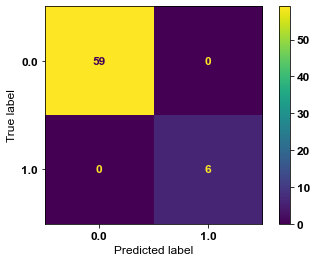

In [31]:
# Cancer vs Non-cancer
svc_canc_mod = SVC(kernel="linear", C=100)
svc_canc_mod.fit(canc_data_mod, canc_labels_mod)
plot_confusion_matrix(svc_canc_mod, canc_data_mod, canc_labels_mod)

b_coeff_canc_mod = - svc_canc_mod.intercept_[0]/linalg.norm(svc_canc_mod.coef_[0])
norm_vec_canc_mod = svc_canc_mod.coef_[0]/linalg.norm(svc_canc_mod.coef_[0])
canc_centroid_mod = (basal_centroid_mod + luminal_centroid_mod)/2.0
s_vec_canc_mod = (canc_centroid_mod - normal_centroid_mod)/linalg.norm(canc_centroid_mod - normal_centroid_mod)



angle_canc_mod = (np.arccos(np.dot(norm_vec_canc_mod,s_vec_canc_mod))/np.pi)*180
print(angle_canc_mod)


In [32]:

norm_vec_2D_df_mod = pd.DataFrame(np.array([norm_vec_canc_mod,np.array(s_vec_canc_mod),norm_vec_LB_mod,np.array(s_vec_LB_mod)]),columns=luminal_mod.T.index,index=['norm_vec_canc','s_vec_canc','norm_vec_LB','s_vec_LB']).T
norm_vec_2D_df_mod.to_csv('STV_2D_mod.csv')
norm_vec_2D_df_mod

,norm_vec_canc,s_vec_canc,norm_vec_LB,s_vec_LB
b.CATENIN,-0.108872,-0.011790,0.027845,0.007019
cleavedCas,0.295838,-0.391881,0.052174,-0.001671
CyclinB,0.146746,-0.294315,0.058676,0.270111
GAPDH,-0.245648,0.003462,0.150909,0.110764
IdU,-0.013403,-0.117622,0.168409,0.286753
Ki.67,0.102995,-0.185873,0.257315,0.361176
p.4EBP1,-0.021732,0.081354,0.020771,-0.059559
p.AKT.Thr308.,0.132707,-0.094676,0.078733,-0.011751
p.AMPK,0.126065,-0.133643,-0.128401,0.166783
p.BTK,-0.290412,-0.013856,-0.458313,-0.018266


In [33]:
mod_full_df = df.drop(output_lst, axis=1)
# mod_full_df = mod_full_df[mod_full_df.treatment == "full"].set_index("cell_line")
# mod_full_df = mod_full_df.set_index("cell_line")
# mod_full_df = mod_full_df.drop(["treatment", "time"],axis=1)



DPDs_2D_mod_nfull = pd.DataFrame(np.zeros((len(mod_full_df.T.columns),2)),index=mod_full_df.T.columns,columns=['DPD_canc','DPD_LB'])


for smpl in mod_full_df.T.columns:
    DPDs_2D_mod_nfull.at[smpl,'DPD_canc'] = - (b_coeff_canc_mod - np.dot(mod_full_df.T.loc[:,smpl].fillna(0),norm_vec_2D_df_mod['norm_vec_canc']))/np.dot(norm_vec_2D_df_mod['norm_vec_canc'],norm_vec_2D_df_mod['s_vec_canc'])
    DPDs_2D_mod_nfull.at[smpl,'DPD_LB'] = - (b_coeff_LB_mod - np.dot(mod_full_df.T.loc[:,smpl].fillna(0),norm_vec_2D_df_mod['norm_vec_LB']))/np.dot(norm_vec_2D_df_mod['norm_vec_LB'],norm_vec_2D_df_mod['s_vec_LB'])
        

DPDs_2D_mod = DPDs_2D_mod_nfull.filter(regex="_full", axis=0)
DPDs_2D_mod["new_cell_line"] = DPDs_2D_mod.index.str.split("_")
DPDs_2D_mod["new_cell_line2"] = DPDs_2D_mod.new_cell_line.str[0]

DPDs_2D_mod = DPDs_2D_mod.set_index("new_cell_line2").drop("new_cell_line",axis=1)
 
DPDs_2D_mod

/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1999/3682571028.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPDs_2D_mod["new_cell_line"] = DPDs_2D_mod.index.str.split("_")
/var/folders/x0/mtqbk1w92ps5s326vkbvv9n40000gn/T/ipykernel_1999/3682571028.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DPDs_2D_mod["new_cell_line2"] = DPDs_2D_mod.new_cell_line.str[0]


,DPD_canc,DPD_LB
new_cell_line2,,
184A1,-0.927747,0.202297
184B5,-0.596069,-1.144917
AU565,2.116510,-1.340539
BT20,1.236303,0.377316
BT474,1.056318,-0.692588
...,...,...
UACC812,1.284361,-0.943405
UACC893,4.120455,-2.099509
ZR751,2.977401,-0.362626


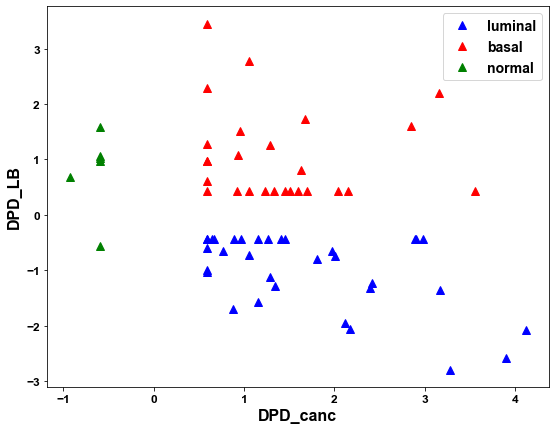

In [34]:
# now let's see what we have
# 2D visualization for multi svm
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)

luminal_mod_with_col = mod_df.loc[mod_df["cell_line"].isin(luminal_cell_names)]
luminal_mod_with_col = luminal_mod_with_col.set_index("cell_line").drop(["treatment", "time"], axis=1).T

basal_mod_with_col =  mod_df.loc[mod_df["cell_line"].isin(basal_cell_names)]
basal_mod_with_col = basal_mod_with_col.set_index("cell_line").drop(["treatment", "time"], axis=1).T

normal_mod_with_col = mod_df.loc[mod_df["cell_line"].isin(normal_cell_names)]
normal_mod_with_col = normal_mod_with_col.set_index("cell_line").drop(["treatment", "time"], axis=1).T


fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 14} 
plt.rc('font', **fontAxes)


ax.plot(DPDs_2D_mod.loc[luminal_mod_with_col.columns].iloc[:,0],DPDs_2D_full.loc[luminal_mod_with_col.columns].iloc[:,1],'^',color='blue',label='luminal',ms=8)
ax.plot(DPDs_2D_mod.loc[basal_mod_with_col.columns].iloc[:,0],DPDs_2D_full.loc[basal_mod_with_col.columns].iloc[:,1],'^',color='red',label='basal',ms=8)
ax.plot(DPDs_2D_mod.loc[normal_mod_with_col.columns].iloc[:,0],DPDs_2D_full.loc[normal_mod_with_col.columns].iloc[:,1],'^',color='green',label='normal',ms=8)

ax.set_xlabel('DPD_canc',**fontLabel)
ax.set_ylabel('DPD_LB',**fontLabel)



ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.show()


In [35]:
angle_n_mod = (np.arccos(np.dot(norm_vec_2D_df_mod['norm_vec_canc'],norm_vec_2D_df_mod['norm_vec_LB']))/np.pi)*180
angle_s_mod = (np.arccos(np.dot(norm_vec_2D_df_mod['s_vec_canc'],norm_vec_2D_df_mod['s_vec_LB']))/np.pi)*180
print(angle_n_mod)
print(angle_s_mod)

85.05867268099401
94.04640997446958


In [36]:
# NUM_PERTS = 5
# perts_lst = [[m_+"_"+str(i) for i in range(NUM_PERTS)] for m_ in modules_df["Perturbation"]]
# perts_lst_updated = []
# for p in perts_lst:
#     for q in p:
#         perts_lst_updated.append(q)
# perts_lst = perts_lst_updated

perts_lst = modules_df["Perturbation"]
def create_resp_mat(line,time):   
    matrix = pd.DataFrame(index=list(modules_df.index) + ["DPD_LB", "DPD_canc"], columns=perts_lst)
    for module in modules_df.index:
        for pert in perts_lst:
            try:
                output = modules_df["Output"].loc[module]
                # output = "p.Akt.Ser473." if output == "p.Akt.Ser473" else output
                x_1_df = df_copy[(df_copy.cell_line == line) & (df_copy.time == time) & (df_copy.treatment == pert)]
                x_0_df =  df_copy[(df_copy.cell_line == line) & (df_copy.time == time) & (df_copy.treatment == "EGF")]
                x_0 = x_0_df[output].iloc[0]
                x_1 = x_1_df[output].iloc[0]
                rij = 2*(x_1 - x_0) / (x_1+x_0)
                matrix.at[module, pert] = rij
            except:
                matrix.at[module, pert] = 0
    
    for dpd_module in ["DPD_LB", "DPD_canc"]:
        for pert in perts_lst:
            try:
                line_comb_x1 = f"{line}_{time}_{pert}"
                line_comb_x0 = f"{line}_{time}_EGF"
                # print(line_comb)
                x_1 = DPDs_2D_mod_nfull.loc[line_comb_x1].loc[dpd_module]
                x_0 = DPDs_2D_mod_nfull.loc[line_comb_x0].loc[dpd_module]
                val = (x_1 - x_0) / max(np.abs(x_1), np.abs(x_0))
                matrix.at[dpd_module, pert] = val
                # print(x_1_df)
            # x_1_df = DPDs_2D_mod_nfull
            except:
                matrix.at[dpd_module, pert] = 0

    return matrix

# create_resp_mat("MDAMB157",0.0)
# df_copy

In [50]:
import os
import os
cwd = os.getcwd()

# os.mkdir("RAW")
def create_global_mat():
    timestamps = [7.0,9.0,13.0,17.0,40.0,60.0]
    cell_lines_all = list(df_copy.cell_line.unique())
    global_mat = pd.DataFrame(index=cell_lines_all, columns=timestamps)
    for line in cell_lines_all:
        for t in timestamps:
            local_resp_mat = create_resp_mat(line,t)
            local_resp_mat.to_csv(f"/Users/atamb/Documents/compbio/RAW/{line}_{t}.csv")
            global_mat.at[line,t] =local_resp_mat 

    return global_mat

print(cwd)


/Users/atamb/Documents/compbio


In [51]:
global_resp_matrix = create_global_mat()

Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.082462,0.025092,-0.209268,-0.059938
PI3K_AKT,-0.091397,-0.125899,-0.061972,0.03141
MEK_ERK,0.037597,-0.014645,-0.294796,0.110361
PKC,-0.02706,-0.065419,-0.137018,-0.133843
DPD_LB,-0.345892,0.124266,1.501564,1.55683
DPD_canc,-0.062494,0.313196,0.479721,0.453466


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.143542,-0.004769,-0.255534,-0.103451
PI3K_AKT,-0.094654,-0.11226,-0.055142,0.046839
MEK_ERK,-0.037903,-0.05574,-0.347444,0.064659
PKC,-0.072463,-0.063046,-0.154943,-0.157616
DPD_LB,-0.898184,-0.73498,1.215181,1.094951
DPD_canc,0.986462,0.987334,0.991888,0.991731


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.043088,0.072448,-0.142561,0.034666
PI3K_AKT,0.042394,-0.054434,0.02531,0.099932
MEK_ERK,0.113212,0.09663,-0.285336,0.116323
PKC,0.135646,0.115082,-0.05054,-0.105224
DPD_LB,-0.521248,0.794467,1.842259,1.802928
DPD_canc,-1.109889,-1.230585,0.757763,0.790259


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.033384,0.066938,-0.144989,0.048575
PI3K_AKT,0.016837,-0.070233,-0.006161,0.076768
MEK_ERK,0.057134,0.078574,-0.265562,0.102825
PKC,0.060158,0.082177,-0.071704,-0.145983
DPD_LB,-0.630374,0.817387,1.937856,1.423855
DPD_canc,-0.646065,-0.4106,1.788073,1.607325


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.100043,0.081719,-0.005087,0.190664
PI3K_AKT,0.060998,-0.075463,0.073029,0.162519
MEK_ERK,0.064712,-0.013469,-0.070297,0.201141
PKC,0.139489,0.021925,0.178586,0.07017
DPD_LB,-0.284682,0.296667,1.251838,0.810698
DPD_canc,-0.964626,1.226046,-0.969021,-0.965398


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.183129,0.155677,0.107963,0.285419
PI3K_AKT,0.13801,-0.018306,0.160217,0.247112
MEK_ERK,0.135105,-0.004584,-0.005307,0.239218
PKC,0.258405,0.059227,0.285052,0.169743
DPD_LB,-0.073012,0.251743,1.072911,0.646533
DPD_canc,-1.152449,-0.066584,-1.115058,-1.132604


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.133426,0.116644,0,-0.040338
PI3K_AKT,-0.130693,-0.125613,0,-0.078243
MEK_ERK,-0.298343,-0.065356,0,-0.16816
PKC,-0.218734,0.263558,0,-0.194349
DPD_LB,-0.215969,-0.04795,0,-0.146886
DPD_canc,-0.063017,1.295071,0,-0.437932


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.125436,0.081188,0,-0.083442
PI3K_AKT,-0.101645,-0.102348,0,-0.055672
MEK_ERK,-0.201059,0.004607,0,-0.142035
PKC,-0.277361,0.129246,0,-0.285879
DPD_LB,-0.534513,-0.449299,0,-0.464306
DPD_canc,0.446951,1.90959,0,0.358367


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.069962,-0.051167,0,-0.156097
PI3K_AKT,-0.064572,-0.131878,0,-0.080861
MEK_ERK,-0.100996,-0.109579,0,-0.190446
PKC,-0.114546,-0.066562,0,-0.294766
DPD_LB,-0.261494,-0.366796,0,-0.073641
DPD_canc,-0.062517,1.367139,0,0.596717


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.02785,-0.090921,0,-0.146543
PI3K_AKT,-0.038781,-0.098145,0,-0.043243
MEK_ERK,-0.08215,-0.116164,0,-0.226301
PKC,-0.052206,-0.166433,0,-0.224945
DPD_LB,-0.12323,-0.244561,0,0.254594
DPD_canc,-0.384186,0.33033,0,0.414979


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.024649,-0.03604,0,0.055719
PI3K_AKT,0.019758,-0.059399,0,0.095365
MEK_ERK,0.020224,-0.039679,0,0.089332
PKC,0.063484,-0.035016,0,0.092819
DPD_LB,-0.104442,-0.090752,0,0.175443
DPD_canc,-0.158272,0.444809,0,-0.233594


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.026299,-0.019871,0,0.118493
PI3K_AKT,0.030633,-0.093555,0,0.097151
MEK_ERK,0.061505,-0.081636,0,0.168082
PKC,0.12008,-0.046591,0,0.145793
DPD_LB,0.009338,-0.071462,0,0.075808
DPD_canc,-0.217523,0.388392,0,-0.302095


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.08869,-0.039883,-0.079363,0.069838
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.030357,-0.027998,-0.188182,0.045503
PKC,-0.080865,-0.089612,-0.005123,-0.090821
DPD_LB,-0.150872,-0.043742,0.30183,0.00573
DPD_canc,0.152682,0.103703,0.023974,0.312261


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.156384,-0.06098,-0.087542,0.027451
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.050523,-0.01594,-0.179189,0.033566
PKC,-0.068264,-0.044297,0.026357,-0.076496
DPD_LB,-0.140272,-0.041057,0.368501,0.013332
DPD_canc,0.438361,0.324051,0.32501,0.486037


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.301823,-0.041658,0.009454,0.088128
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.17844,0.039813,-0.138101,0.009773
PKC,-0.24714,0.073757,-0.00818,-0.139871
DPD_LB,-0.049337,-0.069207,0.297132,-0.062967
DPD_canc,0.428302,0.389866,-0.180059,-0.008324


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.332106,-0.005352,0.0831,0.143717
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.218206,0.03622,-0.126627,0.004767
PKC,-0.325503,0.057391,-0.004756,-0.162321
DPD_LB,0.000556,-0.086712,0.318225,-0.063289
DPD_canc,0.448516,0.345985,-0.278414,-0.398724


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.263063,-0.0962,0.053772,0.193443
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.236377,-0.039178,-0.271661,-0.008873
PKC,-0.483305,-0.117913,-0.127049,-0.214291
DPD_LB,-0.030644,-0.109694,0.369446,0.100052
DPD_canc,0.198613,0.04412,-0.495836,-0.568705


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.256586,-0.163044,0.003446,0.198128
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.251764,-0.043783,-0.331727,-0.005069
PKC,-0.568703,-0.132652,-0.171236,-0.216358
DPD_LB,-0.153662,-0.185859,0.327297,0.10815
DPD_canc,0.131141,0.094027,-0.47379,-0.528081


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.022982,0.004963,-0.021978,0.115879
PI3K_AKT,0.014037,-0.105106,0.010417,0.021808
MEK_ERK,-0.027859,0.007991,-0.291941,-0.012069
PKC,0.009858,-0.010341,0.001333,-0.156565
DPD_LB,-1.326823,0.325668,0.785345,0.780294
DPD_canc,-0.186226,-0.228369,-0.602613,-0.119932


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.02286,-0.028109,-0.069543,0.072887
PI3K_AKT,0.010482,-0.102265,0.005538,0.027793
MEK_ERK,-0.006647,0.042448,-0.291761,0.017368
PKC,0.011709,0.021095,0.006909,-0.12975
DPD_LB,-1.20764,0.689459,0.83377,0.86334
DPD_canc,-0.151119,-0.144097,-0.627841,-0.027777


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.059553,-0.051976,-0.030424,0.03734
PI3K_AKT,-0.004955,-0.120124,0.010667,0.012577
MEK_ERK,-0.013759,0.045932,-0.245422,0.019819
PKC,-0.008354,0.018334,0.012818,-0.1233
DPD_LB,-1.030176,0.936384,0.963761,0.970927
DPD_canc,-0.114196,0.074179,-0.972323,0.2402


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.061279,-0.051056,-0.008883,0.017314
PI3K_AKT,-0.016002,-0.13239,0.009497,0.004
MEK_ERK,-0.034705,0.038195,-0.249136,0.003391
PKC,-0.019027,0.021494,0.013901,-0.124703
DPD_LB,-0.868658,1.313329,1.185183,1.154345
DPD_canc,0.043216,0.460472,-1.251414,0.549107


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.023326,-0.033003,-0.023072,-0.007646
PI3K_AKT,-0.040311,-0.183634,-0.022597,-0.05151
MEK_ERK,-0.075022,-0.018154,-0.254186,-0.045938
PKC,-0.068841,-0.110862,-0.031774,-0.250458
DPD_LB,-1.689245,-1.086677,0.546765,-0.80918
DPD_canc,-1.000943,-0.503742,-1.566395,-0.593218


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.011333,0.010006,-0.015918,0.02886
PI3K_AKT,-0.030062,-0.178446,-0.01885,-0.057247
MEK_ERK,-0.046506,-0.005283,-0.225407,-0.033955
PKC,-0.039748,-0.116645,-0.01053,-0.265107
DPD_LB,-1.645633,-1.330887,0.487862,-1.577167
DPD_canc,-1.08478,-1.041606,-1.484182,-1.321566


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.146321,0.16496,0.106768,0.246197
PI3K_AKT,-0.101187,-0.278406,0.107641,0.118589
MEK_ERK,0.050074,0.1322,-0.2013,0.200619
PKC,0.004359,0.068427,0.115384,-0.014953
DPD_LB,-0.011612,0.232099,0.169216,0.145328
DPD_canc,-0.212896,-0.346204,-0.662859,-0.578759


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.00733,0.01067,-0.05531,0.086734
PI3K_AKT,-0.170745,-0.372787,0.037568,0.040058
MEK_ERK,-0.032905,0.037129,-0.296538,0.109433
PKC,-0.091471,-0.036443,0.009454,-0.121377
DPD_LB,0.069844,0.269617,0.173318,0.146565
DPD_canc,-0.184037,-0.289228,-0.541656,-0.510035


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.021195,-0.053865,-0.070089,0.027669
PI3K_AKT,-0.209256,-0.435752,0.015095,0.019927
MEK_ERK,-0.049602,0.004151,-0.315154,0.038088
PKC,-0.051569,-0.040082,-0.027631,-0.139285
DPD_LB,-0.017913,0.124821,0.040076,-0.062777
DPD_canc,0.003051,0.401121,-0.257109,0.241196


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.033853,-0.039578,-0.050746,0.023022
PI3K_AKT,-0.252438,-0.44616,0.041656,0.039463
MEK_ERK,-0.063278,0.013379,-0.277283,0.058181
PKC,-0.051325,-0.034427,-0.00253,-0.120747
DPD_LB,0.024881,0.122238,0.014733,-0.103329
DPD_canc,-0.027554,0.270029,-0.186797,0.369094


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.145838,-0.057817,-0.004449,-0.010939
PI3K_AKT,-0.495519,-0.464451,0.03647,0.018651
MEK_ERK,-0.200089,-0.062176,-0.311479,0.023233
PKC,-0.291084,-0.16112,-0.080939,-0.210832
DPD_LB,-0.013875,0.115103,-0.071266,-0.180517
DPD_canc,0.138183,0.2317,-0.586194,0.312941


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.137012,-0.101813,0.013453,-0.04568
PI3K_AKT,-0.524382,-0.459939,0.058046,0.013498
MEK_ERK,-0.186537,-0.06727,-0.293859,-0.000674
PKC,-0.351442,-0.149128,-0.059561,-0.224911
DPD_LB,0.120443,0.197719,0.079943,-0.14706
DPD_canc,-0.287632,0.324513,-0.822264,0.187343


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.032478,-0.039561,0.078476
PI3K_AKT,0,-0.368917,-0.002587,-0.019138
MEK_ERK,0,-0.181498,-0.747676,-0.150407
PKC,0,-0.271631,-0.108811,-0.361862
DPD_LB,0,-0.473633,0.076673,-0.294269
DPD_canc,0,-0.105307,-0.08301,-0.005304


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.034784,-0.053713,0.068974
PI3K_AKT,0,-0.373443,0.018742,0.018324
MEK_ERK,0,-0.089155,-0.69333,-0.014803
PKC,0,-0.117863,0.001391,-0.211434
DPD_LB,0,0.077419,0.568262,0.238883
DPD_canc,0,-0.084926,-0.012628,0.075472


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.023887,-0.055729,0.02323
PI3K_AKT,0,-0.437411,-0.003748,-0.008218
MEK_ERK,0,-0.025244,-0.633875,-0.002227
PKC,0,-0.10838,-0.037716,-0.235681
DPD_LB,0,0.031409,0.587071,0.106472
DPD_canc,0,-0.175777,-0.09307,-0.001499


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.031371,-0.059417,0.018067
PI3K_AKT,0,-0.479088,-0.006313,-0.006906
MEK_ERK,0,-0.060176,-0.630995,0.036238
PKC,0,-0.174326,-0.082733,-0.223253
DPD_LB,0,-0.141936,0.436342,-0.028991
DPD_canc,0,-0.103817,-0.022918,0.045829


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0.003035,-0.006258,0.087808
PI3K_AKT,0,-0.481644,0.036693,0.031973
MEK_ERK,0,0.038262,-0.439821,0.151744
PKC,0,-0.165531,0.024423,-0.085253
DPD_LB,0,0.13619,0.394398,0.292808
DPD_canc,0,-0.208177,-0.139724,-0.056743


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0.018373,0.003387,0.091919
PI3K_AKT,0,-0.467297,0.056783,0.047971
MEK_ERK,0,0.016041,-0.403225,0.120347
PKC,0,-0.190562,0.040999,-0.091706
DPD_LB,0,0.097062,0.329847,0.23483
DPD_canc,0,-0.234636,-0.165775,-0.022514


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.013174,-0.04683,-0.13836,-0.028422
PI3K_AKT,-0.06044,-0.345953,0.015444,0.023167
MEK_ERK,-0.028388,-0.104699,-0.688585,-0.079834
PKC,-0.035977,-0.169381,-0.023463,-0.285502
DPD_LB,-0.072979,-0.164759,0.04993,-0.037275
DPD_canc,0.267329,0.479052,-0.078676,0.379876


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.022282,-0.092439,-0.162722,-0.065212
PI3K_AKT,0.017653,-0.295114,0.072202,0.097651
MEK_ERK,0.019465,-0.070249,-0.603691,-0.03336
PKC,0.03602,-0.096512,0.014149,-0.200691
DPD_LB,0.029785,-0.117403,0.133662,0.097905
DPD_canc,0.134611,0.389699,-0.254822,0.188107


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.014217,-0.022341,-0.04455,0.024986
PI3K_AKT,0.066636,-0.290525,0.092002,0.155977
MEK_ERK,0.002877,-0.061785,-0.355304,0.064207
PKC,0.056653,-0.078974,-0.003532,-0.090487
DPD_LB,0.128129,0.057475,0.159063,0.177864
DPD_canc,-0.248207,0.138779,-0.617095,-0.375904


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.013457,-0.035414,-0.029951,0.02406
PI3K_AKT,0.055516,-0.339738,0.062877,0.135288
MEK_ERK,-0.045942,-0.08013,-0.286067,0.080014
PKC,0.035284,-0.089855,-0.023351,-0.076923
DPD_LB,0.0174,-0.019137,0.091255,0.167134
DPD_canc,0.171126,0.368777,-0.601989,-0.496212


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.047031,-0.072588,-0.029336,0.031754
PI3K_AKT,0.005006,-0.501921,0.042639,0.051601
MEK_ERK,-0.184091,-0.172623,-0.337077,0.104369
PKC,-0.054339,-0.219009,-0.014117,-0.123812
DPD_LB,-0.086526,-0.141901,-0.01574,0.113567
DPD_canc,0.501885,0.631756,-0.711741,-0.653419


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.025199,-0.06835,-0.018133,0.046245
PI3K_AKT,0.02836,-0.523788,0.070786,0.058721
MEK_ERK,-0.162876,-0.20279,-0.351783,0.128871
PKC,-0.018621,-0.243638,0.01679,-0.103865
DPD_LB,0.154774,-0.046158,0.096702,0.209529
DPD_canc,0.542183,0.734753,-0.417444,-0.135376


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.018563,0.046469,0.082247,0.149777
PI3K_AKT,-0.00991,-0.041667,0.020541,0.037881
MEK_ERK,-0.069296,-0.022096,-0.068851,0.076504
PKC,-0.010226,0.024364,0.039602,-0.044989
DPD_LB,-0.114709,0.068823,0.098374,0.243001
DPD_canc,0.075869,-0.045361,-0.030795,-0.059978


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.100242,-0.022362,0.003222,0.051769
PI3K_AKT,-0.023695,-0.047929,0.006876,0.023162
MEK_ERK,-0.045906,0.014897,-0.049001,0.079486
PKC,-0.036884,0.012919,0.009815,-0.055772
DPD_LB,-0.098601,0.096186,0.111053,0.221736
DPD_canc,0.079666,-0.077551,-0.031357,-0.045995


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.005581,0.063921,0.086,0.106597
PI3K_AKT,0.001996,-0.036859,0.037859,0.044936
MEK_ERK,-0.013092,0.09789,-0.021,0.07209
PKC,0.009842,0.107042,0.031317,-0.005369
DPD_LB,-0.102858,0.172787,0.064711,0.13998
DPD_canc,0.125138,-0.1332,0.034257,0.00759


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.010658,0.077629,0.101003,0.091956
PI3K_AKT,-0.004141,-0.054294,0.040534,0.038444
MEK_ERK,-0.040473,0.078188,-0.02928,0.026666
PKC,-0.002833,0.092452,-0.001577,-0.008989
DPD_LB,-0.128589,0.123315,-0.019492,0.020216
DPD_canc,0.161013,-0.074166,0.099771,0.063398


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.036405,0.011525,0.090118,0.060848
PI3K_AKT,-0.019682,-0.162721,0.028942,0.002609
MEK_ERK,0.018311,0.054227,-0.044431,0.064154
PKC,0.046896,-0.005713,0.026896,-0.10978
DPD_LB,0.274316,0.04111,0.135076,0.088591
DPD_canc,-0.177888,-0.146701,-0.193977,-0.191233


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.014027,-0.052532,0.060174,0.027326
PI3K_AKT,-0.019736,-0.195651,0.028172,-0.003557
MEK_ERK,0.020515,0.034138,-0.075681,0.070852
PKC,0.078896,-0.01663,0.070069,-0.150858
DPD_LB,0.550561,0.136954,0.380717,0.258398
DPD_canc,-0.290968,-0.185243,-0.321996,-0.268023


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.019877,-0.009429,-0.117986,0.040285
PI3K_AKT,-0.022297,-0.334619,-0.034893,-0.030293
MEK_ERK,-0.028121,-0.033155,-0.525368,-0.041206
PKC,-0.004067,-0.060892,-0.044276,-0.245087
DPD_LB,0.136466,-0.062464,0.109248,0.155314
DPD_canc,-0.280877,-0.031416,-0.668814,0.359356


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.000755,-0.034637,-0.112933,0.027208
PI3K_AKT,-0.011285,-0.325533,-0.026495,-0.017387
MEK_ERK,-0.023751,-0.020828,-0.494508,-0.017554
PKC,-0.000789,-0.05155,-0.04148,-0.228327
DPD_LB,0.012658,-0.177066,-0.032383,0.023228
DPD_canc,-0.193452,0.181242,-0.614182,0.350557


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.040428,-0.037845,-0.027602,0.047498
PI3K_AKT,-0.027296,-0.324952,-0.004872,-0.009577
MEK_ERK,-0.074977,-0.0218,-0.404431,-0.007277
PKC,-0.001249,-0.054004,-0.022067,-0.198358
DPD_LB,0.050558,0.089968,0.084324,0.164535
DPD_canc,0.095459,0.207238,-0.50817,0.065768


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.007712,0.010601,0.050075,0.095259
PI3K_AKT,-0.008369,-0.30725,0.007844,0.004728
MEK_ERK,-0.074271,-0.007376,-0.357567,0.005988
PKC,0.017762,-0.03728,-0.010541,-0.176388
DPD_LB,0.16083,0.20694,0.152096,0.233277
DPD_canc,-0.169405,-0.042265,-0.58167,-0.229003


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.000787,0.009432,0.069346,0.051838
PI3K_AKT,-0.004847,-0.24458,-0.001811,-0.017183
MEK_ERK,-0.078274,-0.045913,-0.307061,-0.019563
PKC,0.006397,-0.066576,-0.031969,-0.21678
DPD_LB,0.074678,-0.065991,-0.109514,-0.098655
DPD_canc,0.084921,-0.218438,-0.492734,0.246306


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.03565,-0.021803,0.0612,0.027908
PI3K_AKT,-0.018026,-0.228523,-0.003487,-0.026703
MEK_ERK,-0.093981,-0.075459,-0.296163,-0.030448
PKC,-0.018805,-0.100535,-0.047278,-0.240312
DPD_LB,0.037526,-0.112653,-0.152805,-0.151763
DPD_canc,0.234227,-0.236486,-0.518767,0.284734


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.018122,-0.02454,-0.003892,0.00134
PI3K_AKT,-0.203448,-0.335215,0.035087,0.036968
MEK_ERK,-0.046608,-0.043651,-0.378628,-0.029457
PKC,-0.064996,-0.081396,0.026056,-0.19277
DPD_LB,-0.47917,-0.335879,0.276418,-0.011738
DPD_canc,0.235416,-0.031675,-1.339473,-0.031681


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.058474,-0.067184,-0.045781,-0.051996
PI3K_AKT,-0.163664,-0.320804,0.097686,0.093724
MEK_ERK,-0.076442,-0.085141,-0.348319,-0.050455
PKC,-0.084289,-0.118367,0.009491,-0.199496
DPD_LB,-0.528493,-0.43081,0.155004,-0.163876
DPD_canc,0.562126,0.452195,-1.457841,0.484239


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.005832,-0.029769,-0.030143,-0.048535
PI3K_AKT,-0.114455,-0.263571,0.181382,0.172312
MEK_ERK,-0.024354,-0.038412,-0.254801,0.005346
PKC,0.020528,-0.051718,0.013762,-0.122959
DPD_LB,-0.028004,-0.309744,0.119751,0.05021
DPD_canc,0.517481,0.581884,-0.770393,0.487623


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.006862,-0.018629,-0.021218,-0.052933
PI3K_AKT,-0.102188,-0.252515,0.213793,0.195702
MEK_ERK,-0.040346,-0.030472,-0.207006,0.031761
PKC,0.022435,-0.039312,0.018889,-0.092915
DPD_LB,0.034703,-0.228479,0.105828,0.130913
DPD_canc,0.53774,0.619938,-0.835066,0.525504


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.038968,-0.009721,-0.037203,-0.073684
PI3K_AKT,-0.139889,-0.240357,0.172219,0.111195
MEK_ERK,-0.14651,-0.030455,-0.274594,0.059859
PKC,-0.074581,-0.043983,-0.018223,-0.129539
DPD_LB,0.030794,0.152976,0.132072,0.158402
DPD_canc,-0.116285,0.236334,-1.567966,-0.443275


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.015255,0.019241,-0.019212,-0.056138
PI3K_AKT,-0.124066,-0.209626,0.180516,0.096618
MEK_ERK,-0.126875,0.000909,-0.268637,0.087963
PKC,-0.042512,-0.007503,0.011123,-0.12428
DPD_LB,0.268752,0.334846,0.292729,0.19986
DPD_canc,-0.432157,0.109404,-1.674402,-0.615946


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.410027,0.206396,0.237844,0.367853
PI3K_AKT,0.252803,0.120875,0.157058,0.204019
MEK_ERK,0.178391,-0.062598,0.096007,0.012652
PKC,0.239984,-0.240734,0.173959,0.090737
DPD_LB,1.650655,0.63789,0.353053,1.042978
DPD_canc,-0.400382,-0.260239,-0.228848,-0.42113


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.468991,0.226403,0.313603,0.441999
PI3K_AKT,0.324306,0.169145,0.239163,0.288193
MEK_ERK,0.16131,-0.105588,0.088011,0.017877
PKC,0.210529,-0.259344,0.157482,0.090596
DPD_LB,1.657635,0.573478,0.443589,1.378077
DPD_canc,-0.446889,-0.283163,-0.282405,-0.495515


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.230287,0.074445,0.266311,0.282397
PI3K_AKT,0.140616,0.039963,0.191154,0.155697
MEK_ERK,0.063114,-0.131499,0.090458,-0.023306
PKC,0.095532,-0.269472,0.143976,0.057577
DPD_LB,0.895262,0.668859,0.44697,1.849024
DPD_canc,-0.182596,-0.145459,-0.301403,-0.394046


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.019264,-0.03539,0.153758,0.121398
PI3K_AKT,0.002122,-0.042212,0.113482,0.041271
MEK_ERK,-0.01416,-0.152998,0.070559,-0.052748
PKC,0.014321,-0.283114,0.11237,0.01498
DPD_LB,0.085918,1.37975,0.781176,1.414173
DPD_canc,0.038978,-0.044968,-0.261351,-0.329157


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.097929,-0.009743,0.040773,-0.080485
PI3K_AKT,-0.003588,-0.001058,0.049742,-0.063805
MEK_ERK,-0.085324,-0.169747,0.02123,-0.112619
PKC,-0.024115,-0.296369,0.052049,-0.097603
DPD_LB,-0.699812,1.150613,1.392472,1.184982
DPD_canc,0.181808,-0.030647,-0.167935,-0.046814


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.15132,-0.126681,-0.003736,-0.216638
PI3K_AKT,0.03063,-0.042835,0.04764,-0.113498
MEK_ERK,-0.10011,-0.224115,0.013697,-0.152405
PKC,-0.005272,-0.343477,0.051808,-0.127079
DPD_LB,-0.493274,1.565862,1.774564,1.030605
DPD_canc,0.249259,0.12404,-0.087757,0.186896


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.116033,-0.084073,-0.134831,0.065127
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.222209,-0.150333,-0.269396,-0.096382
PKC,-0.225171,-0.281089,-0.08003,-0.335391
DPD_LB,-0.256573,-0.165333,-0.21321,-0.111644
DPD_canc,0.249775,0.213443,0.160928,-0.080113


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.10584,-0.067944,-0.126953,0.064235
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.137291,-0.056456,-0.161001,-0.01427
PKC,-0.17423,-0.223616,-0.021297,-0.281926
DPD_LB,-0.286008,-0.179977,-0.257446,-0.188404
DPD_canc,0.128156,0.116856,0.086688,-0.181127


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.068485,-0.01208,-0.066692,0.079022
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.06878,0.05678,-0.05749,0.030488
PKC,-0.113986,-0.123648,0.092688,-0.17472
DPD_LB,-0.180298,-0.016355,-0.072948,0.017658
DPD_canc,0.099654,-0.060397,-0.008335,-0.175655


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.04367,-0.004037,-0.056456,0.079584
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.008147,0.07369,-0.038096,0.058322
PKC,-0.082124,-0.133484,0.094345,-0.161302
DPD_LB,-0.028678,0.094734,0.065921,0.105778
DPD_canc,-0.058595,-0.146109,-0.062441,-0.27659


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.044816,-0.018811,-0.008907,0.106236
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.090408,0.050507,-0.07074,0.079395
PKC,-0.016884,-0.21734,0.047259,-0.184607
DPD_LB,0.089886,0.080392,0.174298,0.096823
DPD_canc,-0.18338,-0.22751,-0.048897,-0.247442


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.031344,-0.033949,-0.004412,0.075728
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.093559,0.047236,-0.061615,0.066767
PKC,0.000191,-0.213772,0.063534,-0.189947
DPD_LB,0.097124,0.125021,0.210513,0.098367
DPD_canc,-0.244274,-0.322492,-0.22082,-0.266349


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.093552,0.030057,0.027221,0.03215
PI3K_AKT,-0.216923,-0.312766,0.088075,0.069921
MEK_ERK,-0.189761,-0.079518,-0.082257,-0.012203
PKC,-0.238904,-0.199036,0.057641,-0.227508
DPD_LB,-0.225061,-0.169698,0.577157,-0.184798
DPD_canc,0.250676,0.144117,-0.609338,0.14174


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.155463,-0.059138,-0.057343,-0.039578
PI3K_AKT,-0.192005,-0.322881,0.085716,0.059937
MEK_ERK,-0.21219,-0.13197,-0.134881,-0.064091
PKC,-0.209746,-0.207512,0.038821,-0.247791
DPD_LB,-0.419028,-0.478418,0.347365,-0.48205
DPD_canc,0.402399,0.398795,-0.510763,0.382389


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.07604,0.003708,-0.059247,0.028012
PI3K_AKT,-0.239146,-0.372527,0.085753,0.083199
MEK_ERK,-0.113079,-0.103166,-0.156078,-0.000508
PKC,-0.14386,-0.277443,-0.022769,-0.191426
DPD_LB,0.33692,-0.324383,0.157188,-0.196156
DPD_canc,0.086292,0.218818,-0.266278,0.280116


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.043522,0.01076,-0.051161,0.066215
PI3K_AKT,-0.261911,-0.407178,0.070713,0.067219
MEK_ERK,-0.078162,-0.087723,-0.143825,0.026268
PKC,-0.129851,-0.292745,-0.032269,-0.18588
DPD_LB,0.571658,-0.296912,0.237626,-0.08669
DPD_canc,-0.133992,0.133884,-0.394703,0.100889


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.021844,0.045407,0.0333,0.101565
PI3K_AKT,-0.437902,-0.446394,0.051177,0.064443
MEK_ERK,-0.099403,-0.0838,-0.092714,0.066644
PKC,-0.350537,-0.303944,0.014554,-0.138188
DPD_LB,0.186619,-0.232484,0.457482,0.100824
DPD_canc,-0.267172,-0.092972,-0.734391,-0.351215


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.097038,0.104582,0.107253,0.132702
PI3K_AKT,-0.476479,-0.430511,0.069238,0.079254
MEK_ERK,-0.06003,-0.05162,-0.052727,0.093269
PKC,-0.400064,-0.28385,0.031475,-0.126188
DPD_LB,0.254159,-0.142126,0.548927,0.173174
DPD_canc,-0.378358,-0.219554,-0.867839,-0.448095


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.040101,-0.029096,-0.068298,0.046189
PI3K_AKT,-0.101704,-0.207796,-0.060279,-0.057147
MEK_ERK,-0.320734,-0.234427,-0.39917,-0.110723
PKC,-0.225202,-0.256973,-0.166028,-0.320614
DPD_LB,-1.218179,-1.256716,-1.422674,-1.218051
DPD_canc,1.305295,1.253131,1.181623,0.42355


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.036977,-0.025863,-0.076635,0.012597
PI3K_AKT,-0.143796,-0.278738,-0.127653,-0.132667
MEK_ERK,-0.259256,-0.152028,-0.352974,-0.081034
PKC,-0.173139,-0.186274,-0.110694,-0.286415
DPD_LB,-0.772207,-0.72047,-0.513067,0.58171
DPD_canc,1.916032,1.752309,1.861868,-0.330543


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.015682,0.057474,-0.080353,0.026379
PI3K_AKT,-0.055595,-0.231925,-0.086459,-0.061555
MEK_ERK,-0.126062,0.109596,-0.213128,0.042933
PKC,-0.05182,0.030481,-0.042956,-0.158988
DPD_LB,-0.145464,0.949193,0.271723,0.833962
DPD_canc,0.899591,-1.024743,0.66719,-1.05707


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.045534,0.063955,-0.069761,0.02718
PI3K_AKT,-0.035006,-0.268665,-0.088884,-0.057245
MEK_ERK,-0.023813,0.17872,-0.157586,0.108052
PKC,0.004858,0.044817,-0.046205,-0.121648
DPD_LB,0.389959,1.090414,0.286037,0.92925
DPD_canc,-1.788183,-1.147317,-0.575145,-1.342037


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.128248,0.06598,0.0566,0.139033
PI3K_AKT,0.01017,-0.312669,0.007614,0.016107
MEK_ERK,0.176971,0.105962,0.001768,0.208616
PKC,0.124722,-0.101902,0.026634,-0.051979
DPD_LB,0.916382,0.207773,0.248796,0.729037
DPD_canc,-1.379318,-1.94017,-1.636159,-1.699537


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.083618,0.014758,0.033584,0.099727
PI3K_AKT,-0.00335,-0.345278,0.01124,0.002922
MEK_ERK,0.145741,-0.014204,0.009881,0.137121
PKC,0.088564,-0.220496,0.022674,-0.100283
DPD_LB,0.920353,-0.200388,0.355187,0.493461
DPD_canc,-1.287121,-1.709722,-1.548533,-1.605525


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.153155,-0.100214,-0.174661,0.04434
PI3K_AKT,-0.126618,-0.498853,0.076476,0.015242
MEK_ERK,-0.17154,-0.102272,-0.867183,-0.063213
PKC,-0.17273,-0.209405,-0.116651,-0.323609
DPD_LB,-1.352772,-1.24542,-0.875981,-0.766034
DPD_canc,0.374809,0.309156,-0.297765,0.149111


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.107881,-0.054855,-0.110293,0.061824
PI3K_AKT,-0.048062,-0.448594,0.152936,0.086757
MEK_ERK,-0.093962,-0.008479,-0.764001,0.034171
PKC,-0.055071,-0.092309,0.010186,-0.177715
DPD_LB,-1.776583,-1.830739,0.108337,0.163835
DPD_canc,0.212448,0.106505,-0.443451,-0.02723


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.078855,-0.017502,-0.015925,0.071503
PI3K_AKT,-0.049311,-0.456385,0.140496,0.074029
MEK_ERK,-0.13449,0.033073,-0.573289,0.081029
PKC,-0.02481,-0.039409,0.071106,-0.10412
DPD_LB,-0.32018,0.464876,1.421496,1.259018
DPD_canc,0.105442,-0.09958,-0.43638,-0.023799


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.046631,-0.004243,0.027215,0.077209
PI3K_AKT,-0.047852,-0.469164,0.120187,0.057504
MEK_ERK,-0.147234,0.023563,-0.513724,0.094472
PKC,-0.000743,-0.047963,0.072134,-0.075531
DPD_LB,0.743983,0.64657,1.155973,1.221558
DPD_canc,0.072189,-0.130215,-0.400487,0.010549


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.075026,0.045529,0.071985,0.111937
PI3K_AKT,-0.051574,-0.487267,0.090489,0.011144
MEK_ERK,-0.100481,-0.043024,-0.440938,0.106562
PKC,0.039128,-0.153265,0.079946,-0.141057
DPD_LB,1.351199,0.23459,0.915196,0.660021
DPD_canc,-0.335628,-0.33517,-0.627385,-0.327772


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.089488,0.035221,0.059675,0.079589
PI3K_AKT,-0.043103,-0.478256,0.098454,0.012754
MEK_ERK,-0.06935,-0.052396,-0.386227,0.127271
PKC,0.016814,-0.205536,0.068806,-0.186989
DPD_LB,1.353904,-0.13257,0.886949,0.398124
DPD_canc,-0.496933,-0.403579,-0.759354,-0.416712


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.060649,-0.028966,-0.027804,0.039967
PI3K_AKT,-0.04506,-0.193248,-0.012205,-0.007861
MEK_ERK,-0.071006,-0.056387,-0.139209,-0.023845
PKC,-0.056894,-0.062295,0.008198,-0.151215
DPD_LB,-1.795698,-1.655183,0.243657,-0.837961
DPD_canc,-0.225105,0.012539,-0.515093,-0.34101


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.074602,-0.0478,-0.034009,0.022207
PI3K_AKT,-0.032591,-0.186984,-0.002703,-0.001084
MEK_ERK,-0.038589,-0.035091,-0.090766,0.000905
PKC,-0.05209,-0.062976,0.000816,-0.155438
DPD_LB,-1.757274,-1.967557,0.034767,-1.092523
DPD_canc,-0.067318,0.258173,-0.3535,-0.142391


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.079981,-0.020863,0.006941,0.043349
PI3K_AKT,-0.021678,-0.20666,0.012689,0.037811
MEK_ERK,-0.020808,-0.014269,-0.041302,0.037229
PKC,0.000038,-0.029823,0.029536,-0.065778
DPD_LB,-0.527147,-0.57827,0.795902,0.949836
DPD_canc,-0.184836,0.279209,-0.208436,-0.138914


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.086489,-0.011505,0.03072,0.05464
PI3K_AKT,-0.034108,-0.227913,0.013522,0.033924
MEK_ERK,-0.044273,-0.017376,-0.029579,0.031258
PKC,-0.021984,-0.03713,0.017243,-0.077509
DPD_LB,-0.313336,-0.383196,0.235962,0.348905
DPD_canc,-0.275385,0.236715,-0.297513,-0.220876


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.108576,-0.035623,0.032814,0.062586
PI3K_AKT,-0.072339,-0.243582,0.01088,0.006948
MEK_ERK,-0.124998,-0.044309,-0.088795,0.009244
PKC,-0.090013,-0.057384,0.008091,-0.140245
DPD_LB,-0.275968,-0.217911,0.5024,-0.185211
DPD_canc,-0.14868,0.400156,-0.460238,0.016301


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.079395,-0.029264,0.045476,0.078105
PI3K_AKT,-0.076301,-0.237189,0.010983,-0.000589
MEK_ERK,-0.113821,-0.032752,-0.102062,0.016092
PKC,-0.084193,-0.049195,0.013678,-0.152683
DPD_LB,-0.073587,0.03999,0.761852,-0.066972
DPD_canc,-0.319733,0.332241,-0.577525,-0.012507


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.116257,-0.040392,-0.251353,0.08695
PI3K_AKT,-0.041737,-0.152766,0.018169,-0.001989
MEK_ERK,-0.075197,-0.17244,-0.642364,0.031062
PKC,-0.022899,-0.052254,0.054121,-0.198668
DPD_LB,-0.389482,1.467678,1.766518,1.115106
DPD_canc,0.212609,-0.460413,-0.447063,-0.205713


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.068318,-0.02319,-0.2198,0.117431
PI3K_AKT,-0.006549,-0.122076,0.04716,0.032962
MEK_ERK,-0.009161,-0.087042,-0.607684,0.106036
PKC,0.018613,-0.032261,0.081175,-0.145208
DPD_LB,-0.631173,0.457856,1.43549,0.917529
DPD_canc,0.196445,-0.396451,-0.535056,-0.214507


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.010444,0.030626,-0.154018,0.101589
PI3K_AKT,-0.013431,-0.152224,0.020832,0.021722
MEK_ERK,-0.043596,-0.036214,-0.613789,0.096824
PKC,0.033247,-0.002602,0.023396,-0.1291
DPD_LB,1.401011,1.296007,1.105418,1.317938
DPD_canc,-0.233141,-0.214343,-0.659181,-0.18072


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.051501,0.006097,-0.167216,0.057156
PI3K_AKT,-0.029798,-0.166767,0.013125,0.016636
MEK_ERK,-0.108114,-0.022667,-0.612977,0.088309
PKC,0.002617,-0.020751,0.01367,-0.127229
DPD_LB,1.583159,1.419076,1.026504,1.078662
DPD_canc,0.10561,0.100357,-0.593237,0.066324


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.221473,-0.035837,-0.169139,0.02957
PI3K_AKT,-0.071494,-0.168534,0.004183,0.011618
MEK_ERK,-0.247401,-0.041131,-0.530026,0.120781
PKC,-0.129896,-0.077764,-0.00429,-0.119681
DPD_LB,-1.128244,0.758907,-1.47694,0.878168
DPD_canc,0.554044,-0.40557,-0.495378,-0.053083


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.201285,0.003556,-0.121983,0.062314
PI3K_AKT,-0.069923,-0.163607,-0.000509,0.012478
MEK_ERK,-0.245198,-0.007721,-0.483073,0.143327
PKC,-0.147878,-0.073931,-0.033291,-0.127095
DPD_LB,-1.597839,0.597363,-1.739204,0.66276
DPD_canc,0.543246,-0.64225,-0.715203,-0.044684


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.105389,-0.038218,-0.046322,0.06971
PI3K_AKT,-0.095421,-0.325336,0.089168,0.149026
MEK_ERK,-0.114611,-0.059107,-0.250901,0.009492
PKC,-0.058766,-0.079183,0.036746,-0.115832
DPD_LB,0.018728,-0.006653,0.058404,0.029828
DPD_canc,-0.01937,0.086683,-0.141554,-0.099639


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.139578,-0.058971,-0.065602,0.054603
PI3K_AKT,-0.129851,-0.368165,0.062348,0.118676
MEK_ERK,-0.167639,-0.100952,-0.286907,-0.024345
PKC,-0.144843,-0.137145,-0.025064,-0.168489
DPD_LB,-0.021991,-0.02044,0.027279,0.00049
DPD_canc,-0.015619,0.088698,-0.116858,-0.090564


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.167039,-0.069805,-0.11327,0.014328
PI3K_AKT,-0.346453,-0.428496,0.039423,0.113552
MEK_ERK,-0.236606,-0.030446,-0.271835,-0.033779
PKC,-0.180659,-0.116379,-0.047968,-0.158861
DPD_LB,0.036669,0.019217,0.025815,-0.02675
DPD_canc,-0.01597,-0.002179,-0.179988,-0.091874


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.166024,-0.033723,-0.105422,0.02543
PI3K_AKT,-0.414631,-0.439264,0.023245,0.114115
MEK_ERK,-0.246836,-0.015767,-0.277097,-0.024909
PKC,-0.21371,-0.119471,-0.073182,-0.14249
DPD_LB,0.05596,0.014922,-0.007677,-0.018007
DPD_canc,0.00223,-0.024072,-0.170991,-0.083429


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.197513,-0.04862,-0.046054,0.095806
PI3K_AKT,-0.481496,-0.449719,0.018933,0.135409
MEK_ERK,-0.109823,-0.030234,-0.295411,0.017166
PKC,-0.264087,-0.212751,-0.109386,-0.163562
DPD_LB,0.177186,-0.026621,-0.019044,0.037569
DPD_canc,0.030325,-0.031761,-0.147768,-0.180726


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.243335,-0.123416,-0.058111,0.097572
PI3K_AKT,-0.519606,-0.473895,0.000855,0.129913
MEK_ERK,-0.125594,-0.099041,-0.346064,0.008893
PKC,-0.323119,-0.292201,-0.156117,-0.189419
DPD_LB,0.134256,-0.079184,-0.056112,0.015876
DPD_canc,0.013376,-0.006144,-0.133578,-0.210534


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.128635,0.010948,-0.037141,0
PI3K_AKT,-0.036506,-0.043416,-0.026499,0
MEK_ERK,-0.112472,-0.049419,-0.441115,0
PKC,-0.062312,-0.037204,-0.055888,0
DPD_LB,0.024027,-0.024705,0.219356,0
DPD_canc,-0.037744,-0.068742,-1.047743,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.231797,-0.077437,-0.079232,0
PI3K_AKT,-0.055773,-0.061706,-0.03799,0
MEK_ERK,-0.140087,-0.058537,-0.457783,0
PKC,-0.060708,-0.04507,-0.063131,0
DPD_LB,0.069098,-0.07355,0.185996,0
DPD_canc,-0.014974,0.048016,-1.007306,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.255529,-0.065318,0.069658,0
PI3K_AKT,-0.019264,-0.038544,0.007389,0
MEK_ERK,-0.187189,-0.073989,-0.371121,0
PKC,-0.001817,-0.072387,-0.038695,0
DPD_LB,0.302629,-0.148508,0.088148,0
DPD_canc,-0.162829,-0.333006,-0.763623,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.219468,-0.00287,0.167752,0
PI3K_AKT,-0.030601,-0.028018,0.003374,0
MEK_ERK,-0.227399,-0.053855,-0.334791,0
PKC,-0.01027,-0.062364,-0.039685,0
DPD_LB,0.247655,-0.176536,0.022256,0
DPD_canc,-0.073047,-0.236843,-0.781459,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.138296,-0.025977,0.022771,0
PI3K_AKT,-0.084169,-0.055913,-0.054378,0
MEK_ERK,-0.272667,-0.082107,-0.294802,0
PKC,-0.111212,-0.106645,-0.084207,0
DPD_LB,-0.032994,-0.19447,0.024269,0
DPD_canc,-0.967727,-0.494973,-1.884345,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.158969,-0.089247,-0.070034,0
PI3K_AKT,-0.087884,-0.064183,-0.055679,0
MEK_ERK,-0.23548,-0.091446,-0.234224,0
PKC,-0.117029,-0.122309,-0.077394,0
DPD_LB,-0.011811,-0.1843,0.093379,0
DPD_canc,-1.278397,-0.561354,-1.988486,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.044474,0.088697,0.044345,0.143623
PI3K_AKT,0.018912,0.046239,0.029872,0.105448
MEK_ERK,-0.054392,0.172908,0.052436,0.154217
PKC,-0.02037,0.094933,0.056648,-0.241809
DPD_LB,-0.099867,0.11892,0.027904,-0.010613
DPD_canc,-0.067057,-0.731456,-0.37262,-0.341348


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.009813,0.031566,0.006896,0.075808
PI3K_AKT,-0.016147,-0.005658,-0.003664,0.051936
MEK_ERK,-0.01013,0.204422,0.066426,0.173001
PKC,0.010954,0.127992,0.11885,-0.197987
DPD_LB,0.028548,0.226016,0.125602,0.097522
DPD_canc,-0.053049,-0.688428,-0.160293,-0.100516


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.087903,0.043686,0.027187,-0.036546
PI3K_AKT,-0.061962,0.004581,0.039894,0.01156
MEK_ERK,-0.09796,0.05141,-0.024625,-0.050939
PKC,-0.080179,-0.015072,0.03308,-0.326925
DPD_LB,-0.093608,0.126911,0.010116,-0.109
DPD_canc,0.093198,-0.948325,-0.290445,0.330277


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.111836,0.034521,0.026865,-0.08493
PI3K_AKT,-0.079834,-0.004409,0.036514,-0.028063
MEK_ERK,-0.099186,0.071304,-0.041837,-0.092082
PKC,-0.098534,-0.000671,0.054373,-0.347847
DPD_LB,-0.096858,0.147311,-0.008231,-0.138131
DPD_canc,0.076379,-0.863558,-0.031693,0.421694


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.179308,-0.11682,-0.081449,-0.208161
PI3K_AKT,-0.17038,-0.114627,-0.086645,-0.183057
MEK_ERK,-0.142121,-0.001423,-0.137175,-0.171805
PKC,-0.103115,-0.051286,-0.062252,-0.515269
DPD_LB,-0.102714,0.163864,-0.06448,-0.150874
DPD_canc,0.535398,0.274132,0.49889,0.611267


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.125353,-0.170942,-0.038182,-0.219567
PI3K_AKT,-0.12795,-0.145178,-0.05243,-0.184856
MEK_ERK,-0.006041,-0.015454,-0.010684,-0.1351
PKC,0.025925,-0.048079,0.013812,-0.508046
DPD_LB,0.043041,0.18112,0.07225,-0.093518
DPD_canc,0.330409,0.373376,0.192228,0.516025


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.029358,-0.092711,-0.241534,0.051963
PI3K_AKT,-0.059702,-0.22753,-0.048506,-0.007542
MEK_ERK,-0.049693,-0.071455,-0.688346,-0.02269
PKC,-0.018656,-0.091032,-0.122161,-0.204
DPD_LB,-0.266801,-0.444632,-0.107865,-0.855728
DPD_canc,-0.217952,0.012976,-0.846243,-0.355926


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.028462,-0.082262,-0.205171,0.071453
PI3K_AKT,-0.0111,-0.201339,0.024296,0.046935
MEK_ERK,-0.005078,-0.017516,-0.602201,0.045758
PKC,0.040569,-0.024512,-0.013014,-0.121013
DPD_LB,0.19254,-0.315596,0.365711,-0.984049
DPD_canc,-0.038732,0.278306,-0.748502,-0.219446


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.029056,-0.095902,-0.113461,0.113633
PI3K_AKT,-0.051289,-0.282761,-0.007904,0.047966
MEK_ERK,-0.066856,-0.09308,-0.494059,0.076252
PKC,0.056311,-0.118382,-0.115666,-0.08518
DPD_LB,0.613063,-0.638062,0.034744,-0.896413
DPD_canc,-0.149524,0.180528,-0.918741,-0.500415


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.069324,-0.097808,-0.066601,0.114162
PI3K_AKT,-0.121891,-0.344312,-0.01337,0.018022
MEK_ERK,-0.149774,-0.119014,-0.385671,0.080288
PKC,-0.014632,-0.170419,-0.097559,-0.116679
DPD_LB,0.530031,-1.018527,-0.091825,-0.900199
DPD_canc,-0.037707,0.2505,-0.901199,-0.829713


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.118355,-0.052369,-0.022223,0.103478
PI3K_AKT,-0.313146,-0.353635,-0.026115,-0.008342
MEK_ERK,-0.282379,-0.109966,-0.298818,0.135301
PKC,-0.219546,-0.222397,-0.087805,-0.164505
DPD_LB,0.793653,-1.278304,0.543871,0.49084
DPD_canc,-0.735404,-0.545135,-1.047435,-1.15243


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.112561,-0.046172,-0.024057,0.096189
PI3K_AKT,-0.323638,-0.319975,0.000593,0.031235
MEK_ERK,-0.267585,-0.097857,-0.297138,0.187924
PKC,-0.204043,-0.20349,-0.058071,-0.096925
DPD_LB,1.001454,-0.998382,1.004237,1.001716
DPD_canc,-0.910029,-0.646476,-1.166776,-1.108547


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.045989,0.034388,0.215882,-0.091054
PI3K_AKT,-0.208472,0.061049,0.231191,-0.041914
MEK_ERK,-0.101718,-0.125248,0.089839,-0.416062
PKC,-0.167164,-0.242899,0.21752,-0.142061
DPD_LB,-0.498264,-0.49911,-0.15275,-0.335975
DPD_canc,0.137416,0.053787,0.063502,0.071083


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.190668,-0.125036,0.016821,-0.264181
PI3K_AKT,-0.333909,-0.037777,0.068594,-0.160458
MEK_ERK,-0.205796,-0.230107,-0.036847,-0.574655
PKC,-0.296124,-0.365684,0.03435,-0.284774
DPD_LB,-0.748028,-0.73424,-0.597091,-0.693871
DPD_canc,0.176599,0.076779,0.095108,0.098722


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.35969,0.155478,0.139691,0.1392
PI3K_AKT,-0.380333,0.20052,0.189724,0.192575
MEK_ERK,-0.247599,0.013267,0.066598,-0.183668
PKC,-0.368312,-0.143682,0.148108,0.109763
DPD_LB,-0.210698,-0.124819,-0.05321,0.786508
DPD_canc,0.052349,0.023183,0.043813,-0.085398


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.282625,0.227058,0.158382,0.246464
PI3K_AKT,-0.337047,0.199725,0.138769,0.232864
MEK_ERK,-0.196913,0.09617,0.101975,-0.078776
PKC,-0.312888,-0.133007,0.119635,0.18027
DPD_LB,0.034979,0.222259,0.172577,1.06608
DPD_canc,0.008473,-0.014061,-0.012803,-0.127394


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.151682,-0.007347,0.240927,0.100899
PI3K_AKT,-0.042711,-0.107704,0.267718,0.118818
MEK_ERK,0.11935,0.021148,0.239384,-0.137304
PKC,0.067756,-0.307765,0.307544,0.113803
DPD_LB,-0.073952,0.041796,0.572401,0.496241
DPD_canc,-0.116804,-0.058424,-0.222381,-0.185974


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.062014,-0.092234,0.181116,-0.035657
PI3K_AKT,-0.13626,-0.197534,0.236284,-0.030914
MEK_ERK,0.081803,-0.023094,0.222835,-0.200311
PKC,-0.05266,-0.405654,0.234852,-0.065861
DPD_LB,-0.045274,0.038958,0.78034,0.293198
DPD_canc,-0.098064,0.02547,-0.214665,-0.161698


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.0774,-0.075504,-0.055288,0
PI3K_AKT,-0.140397,-0.490478,0.050022,0
MEK_ERK,-0.055328,-0.059196,-0.695897,0
PKC,-0.086675,-0.100105,-0.072884,0
DPD_LB,-1.431881,-1.136948,-0.45054,0
DPD_canc,-0.229678,0.006299,-0.259814,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.075631,-0.053164,-0.010018,0
PI3K_AKT,-0.014194,-0.393684,0.175245,0
MEK_ERK,-0.00261,-0.023469,-0.614519,0
PKC,-0.022721,-0.04094,-0.005666,0
DPD_LB,-1.168432,-1.060625,0.44167,0
DPD_canc,-0.15231,0.076773,-0.190771,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.138063,-0.07335,0.028943,0
PI3K_AKT,0.094719,-0.360394,0.210704,0
MEK_ERK,0.085855,-0.083428,-0.366134,0
PKC,0.070087,-0.070787,0.006062,0
DPD_LB,-0.666456,0.217942,1.469816,0
DPD_canc,0.029001,0.053071,-0.213009,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.143222,-0.047767,0.064777,0
PI3K_AKT,0.060798,-0.381956,0.18265,0
MEK_ERK,0.130617,-0.06961,-0.222617,0
PKC,0.065561,-0.102053,0.002705,0
DPD_LB,-0.478278,0.263947,1.051416,0
DPD_canc,0.096664,0.051898,-0.213632,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.067082,-0.087012,-0.032614,0
PI3K_AKT,-0.126372,-0.350694,0.067884,0
MEK_ERK,0.075533,-0.072096,-0.224412,0
PKC,-0.021977,-0.133175,-0.010213,0
DPD_LB,-0.501995,-0.06083,-0.048235,0
DPD_canc,0.014217,0.053421,-0.186709,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.008986,-0.073323,-0.035462,0
PI3K_AKT,-0.135963,-0.280488,0.078323,0
MEK_ERK,0.099735,-0.027886,-0.192268,0
PKC,-0.03495,-0.11709,0.023208,0
DPD_LB,-0.495836,-0.144204,-0.319478,0
DPD_canc,-0.125469,0.006509,-0.213951,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.070562,-0.080072,-0.101659,0.056076
PI3K_AKT,-0.087787,-0.253114,0.026329,0.040619
MEK_ERK,-0.070183,-0.063295,-0.554934,0.001972
PKC,-0.025555,-0.073813,0.040557,-0.1028
DPD_LB,-0.939725,-0.971562,1.012315,1.028933
DPD_canc,-0.01356,0.0623,-0.241786,0.282419


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.07612,-0.077492,-0.087678,0.046345
PI3K_AKT,-0.066252,-0.237981,0.059276,0.066103
MEK_ERK,-0.065215,-0.037173,-0.551884,0.026387
PKC,-0.022026,-0.056733,0.0422,-0.075367
DPD_LB,-1.979681,-1.589966,0.670643,0.235405
DPD_canc,0.330306,0.434573,0.045995,0.506522


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.075911,-0.061913,-0.019378,0.032872
PI3K_AKT,-0.119825,-0.299974,0.071708,0.050938
MEK_ERK,-0.177178,-0.046628,-0.478594,0.041905
PKC,-0.035804,-0.063201,0.015167,-0.068386
DPD_LB,0.882592,0.603875,0.948204,0.929131
DPD_canc,0.417636,0.373725,-0.749215,0.396228


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.077772,-0.046135,0.007161,0.023853
PI3K_AKT,-0.152716,-0.319152,0.058904,0.028107
MEK_ERK,-0.229001,-0.040103,-0.470922,0.046434
PKC,-0.048859,-0.06456,-0.02251,-0.076238
DPD_LB,1.602511,1.12433,0.64754,1.805659
DPD_canc,0.45164,0.421013,-0.811576,0.392514


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.100734,-0.052257,-0.063593,-0.04297
PI3K_AKT,-0.152575,-0.248122,0.023977,0.003813
MEK_ERK,-0.246168,-0.060329,-0.467892,0.047754
PKC,-0.061779,-0.104846,-0.062729,-0.102436
DPD_LB,1.945309,-0.523031,-0.419181,1.084294
DPD_canc,0.031878,-0.097189,-1.274532,0.136989


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.097097,-0.042734,-0.0767,-0.054689
PI3K_AKT,-0.129708,-0.201863,0.033891,0.016752
MEK_ERK,-0.236613,-0.073585,-0.450141,0.058074
PKC,-0.066193,-0.127343,-0.062468,-0.108875
DPD_LB,1.838877,-0.773286,-0.652857,0.564282
DPD_canc,0.127093,0.076193,-1.994239,0.214998


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.022736,-0.052905,-0.109414,0.154319
PI3K_AKT,-0.09275,-0.320516,-0.045218,-0.023175
MEK_ERK,-0.085602,-0.05914,-0.50766,0.006334
PKC,-0.090217,-0.126542,-0.057264,-0.219227
DPD_LB,1.388553,-0.813706,1.079379,-0.842301
DPD_canc,0.033533,0.498439,-1.848686,0.011418


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.061119,-0.086878,-0.13747,0.105881
PI3K_AKT,-0.067729,-0.314563,-0.031755,-0.008112
MEK_ERK,-0.074283,-0.060336,-0.504534,0.000747
PKC,-0.083303,-0.123721,-0.062857,-0.219292
DPD_LB,-1.737677,-1.201465,0.911884,-1.128429
DPD_canc,1.096993,1.06221,-0.901851,1.148896


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.09567,-0.088951,-0.074564,0.070088
PI3K_AKT,-0.100676,-0.352521,-0.01556,-0.000694
MEK_ERK,-0.126749,-0.040341,-0.453435,0.007181
PKC,-0.078884,-0.069119,-0.033709,-0.164664
DPD_LB,1.489707,1.918963,1.258103,-0.55536
DPD_canc,0.800558,0.698407,-1.166268,0.645282


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.122795,-0.096917,-0.062988,0.060724
PI3K_AKT,-0.123185,-0.384434,-0.010719,0.003984
MEK_ERK,-0.168268,-0.04455,-0.438909,0.013946
PKC,-0.0681,-0.059683,-0.016468,-0.138418
DPD_LB,1.157776,1.22225,1.700235,0.095558
DPD_canc,0.886926,0.801789,-1.108388,0.643451


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.13018,-0.134053,-0.145949,0.031484
PI3K_AKT,-0.131796,-0.450057,-0.038257,-0.000217
MEK_ERK,-0.140088,-0.092631,-0.473239,-0.008312
PKC,-0.034064,-0.183223,-0.104063,-0.199964
DPD_LB,1.469807,0.052948,1.833975,-0.185837
DPD_canc,1.969365,1.750605,-0.718792,0.957175


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.078797,-0.117772,-0.153321,0.05072
PI3K_AKT,-0.100279,-0.459551,-0.056351,0.004154
MEK_ERK,-0.097748,-0.115686,-0.503481,-0.017919
PKC,-0.023924,-0.245193,-0.175049,-0.224744
DPD_LB,1.748383,-0.530794,1.613583,-0.471622
DPD_canc,-0.598258,0.980704,-0.665351,-0.18171


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.203639,-0.070178,0,0.004374
PI3K_AKT,-0.188209,-0.36852,0,0.048366
MEK_ERK,-0.334913,-0.141381,0,-0.14344
PKC,-0.182094,-0.131033,0,-0.250265
DPD_LB,-0.060657,-0.050264,0,-0.050145
DPD_canc,0.247967,0.060834,0,0.253236


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.252959,-0.149485,0,-0.042307
PI3K_AKT,-0.181149,-0.369915,0,0.09061
MEK_ERK,-0.387758,-0.204341,0,-0.181649
PKC,-0.188628,-0.154407,0,-0.239649
DPD_LB,-0.047872,-0.056981,0,-0.052213
DPD_canc,0.529918,0.51698,0,0.570814


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.116787,-0.144229,0,-0.003433
PI3K_AKT,-0.189497,-0.410042,0,0.118819
MEK_ERK,-0.208724,-0.186859,0,-0.080999
PKC,-0.11945,-0.210388,0,-0.201044
DPD_LB,-0.031347,-0.060363,0,-0.067394
DPD_canc,-0.050211,0.54566,0,0.480717


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.113412,-0.139106,0,0.015507
PI3K_AKT,-0.273695,-0.444491,0,0.113905
MEK_ERK,-0.231246,-0.179832,0,-0.047531
PKC,-0.184692,-0.250197,0,-0.205525
DPD_LB,-0.054977,-0.07474,0,-0.097808
DPD_canc,-0.05251,0.517156,0,0.283741


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.250426,-0.20565,0,-0.107344
PI3K_AKT,-0.550142,-0.508065,0,0.045527
MEK_ERK,-0.34473,-0.189247,0,-0.063119
PKC,-0.438329,-0.301165,0,-0.27734
DPD_LB,-0.052127,-0.02176,0,-0.075906
DPD_canc,0.131149,0.326038,0,-0.142425


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.216211,-0.219765,0,-0.162403
PI3K_AKT,-0.555234,-0.509714,0,0.053786
MEK_ERK,-0.289412,-0.199862,0,-0.094472
PKC,-0.435909,-0.319995,0,-0.324808
DPD_LB,-0.017769,-0.002069,0,-0.070651
DPD_canc,-0.24671,0.251434,0,0.022523


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.057991,-0.035827,-0.043229,0.159681
PI3K_AKT,-0.08005,-0.270378,0.00001,0.006137
MEK_ERK,-0.022356,-0.06687,-0.554677,0.01617
PKC,-0.025629,-0.151834,0.006064,-0.149898
DPD_LB,0.126571,-0.186637,0.098743,-0.061256
DPD_canc,0.061551,-0.017842,-0.310182,-0.180451


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.142198,-0.109392,-0.104755,0.078901
PI3K_AKT,-0.068884,-0.24415,0.018201,0.026249
MEK_ERK,-0.089438,-0.110529,-0.594066,-0.030959
PKC,-0.074447,-0.171672,-0.033359,-0.156644
DPD_LB,-0.046184,-0.272406,-0.078067,-0.205584
DPD_canc,0.208357,0.12673,-0.198624,-0.028733


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.111998,-0.143399,-0.07202,0.06551
PI3K_AKT,-0.063098,-0.251257,0.029776,0.032737
MEK_ERK,-0.06185,0.000222,-0.446073,0.0043
PKC,-0.035791,-0.061971,0.02211,-0.088587
DPD_LB,0.037475,0.168656,-0.009943,0.040647
DPD_canc,0.179359,0.136884,-0.212671,-0.030019


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.05605,-0.10931,-0.002139,0.119133
PI3K_AKT,-0.047478,-0.248651,0.048029,0.059178
MEK_ERK,-0.029987,0.054616,-0.315829,0.073595
PKC,-0.005588,-0.0186,0.050869,-0.019097
DPD_LB,0.130555,0.317696,0.019363,0.206343
DPD_canc,0.052509,0.049748,-0.278132,-0.165267


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.169985,0.080833,0.161152,0.301393
PI3K_AKT,0.000289,-0.264753,0.060893,0.072963
MEK_ERK,0.071006,0.119336,-0.222661,0.172106
PKC,0.076937,-0.034432,0.033016,0.004498
DPD_LB,-0.017547,0.002549,-0.43296,-0.053804
DPD_canc,-0.329482,-0.017074,-0.442027,-0.369555


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.190831,0.104675,0.127604,0.299226
PI3K_AKT,0.007377,-0.260928,0.042835,0.057587
MEK_ERK,0.064415,0.089526,-0.315326,0.156024
PKC,0.072321,-0.088606,-0.024591,-0.038162
DPD_LB,-0.026563,-0.190185,-0.487287,-0.073395
DPD_canc,-0.370445,-0.031914,-0.397193,-0.336478


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.101343,-0.040814,0.063872,-0.164696
PI3K_AKT,-0.025882,-0.007782,-0.007429,-0.002531
MEK_ERK,-0.16946,-0.012542,0.023657,-0.455154
PKC,-0.026931,-0.006715,-0.198117,0.027741
DPD_LB,-0.154785,-0.210312,0.129851,0.841349
DPD_canc,-0.160727,-0.008129,0.097514,-0.691328


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.009799,0.063231,0.123312,-0.086958
PI3K_AKT,-0.020269,0.008912,-0.021964,0.0072
MEK_ERK,-0.102579,0.024869,0.007035,-0.400317
PKC,-0.018227,-0.012566,-0.224405,0.016823
DPD_LB,-0.348083,-0.410753,-0.43375,0.828124
DPD_canc,-0.229816,-0.055258,0.264563,-0.585185


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.051383,-0.012683,-0.085738,-0.036396
PI3K_AKT,0.017667,0.034666,-0.137135,0.03449
MEK_ERK,-0.025032,-0.017881,-0.118893,-0.364047
PKC,-0.01675,0.018374,-0.141914,-0.004378
DPD_LB,-0.186887,0.358211,-0.19952,0.39818
DPD_canc,-0.465724,0.145496,0.518782,-0.439104


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.017927,-0.037008,-0.224489,-0.083724
PI3K_AKT,0.005901,0.033458,-0.219117,0.026887
MEK_ERK,0.018818,-0.022912,-0.226382,-0.32786
PKC,-0.017893,0.027777,-0.151151,-0.001816
DPD_LB,0.167569,0.419677,-0.215298,0.466579
DPD_canc,-0.604782,0.187802,0.644675,-0.287172


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.039349,0.012732,-0.120597,-0.092831
PI3K_AKT,-0.016024,-0.012235,-0.117492,-0.015315
MEK_ERK,0.037221,-0.01231,-0.115928,-0.294057
PKC,-0.038849,0.091077,0.04458,0.078658
DPD_LB,-0.266418,-0.396159,-0.455728,-0.033033
DPD_canc,-0.714309,-0.494568,0.180054,-0.53846


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.070543,0.009906,-0.083127,-0.089174
PI3K_AKT,0.013222,-0.000789,-0.036541,-0.001172
MEK_ERK,0.066625,0.003546,-0.018779,-0.270064
PKC,0.01067,0.179743,0.202986,0.171219
DPD_LB,-0.375356,-0.431953,-0.283282,-0.139065
DPD_canc,-0.842955,-0.742279,-0.394509,-0.720435


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.053029,0.048608,-0.032322,0.019317
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.04183,-0.020784,-0.025159,-0.046389
PKC,-0.003035,-0.108185,-0.037772,0.014125
DPD_LB,0.04188,-0.016233,0.016166,0.124283
DPD_canc,0.05708,-0.022679,0.125268,-0.037072


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.16924,0.161624,0.098588,0.121017
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.110418,0.038406,0.055648,0.029497
PKC,0.044718,-0.036375,0.002608,0.034161
DPD_LB,-0.060391,-0.115799,-0.054115,-0.048212
DPD_canc,0.010762,-0.096449,0.048658,-0.037279


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.072365,0.125077,0.032157,0.050777
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.029655,0.005805,0.003476,-0.037136
PKC,-0.005442,-0.132873,0.008453,0.019571
DPD_LB,-0.06236,-0.004,0.012434,0.069574
DPD_canc,0.012015,-0.034168,-0.021981,-0.045017


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.035588,0.120138,0.012285,0.034311
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.013036,0.020421,0.001005,-0.036297
PKC,-0.023116,-0.152693,0.004045,0.012016
DPD_LB,-0.002546,0.108376,0.119438,0.143691
DPD_canc,0.027525,-0.027204,-0.065291,-0.042696


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.103024,0.238057,0.163382,0.176792
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.061693,0.099881,0.077368,-0.005173
PKC,-0.019473,-0.103624,0.069487,0.016275
DPD_LB,0.098973,0.193033,0.200388,0.232259
DPD_canc,-0.046462,-0.10521,-0.109147,-0.21379


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.10578,0.273942,0.226955,0.236975
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.057103,0.102503,0.101743,-0.003072
PKC,-0.062583,-0.116299,0.09696,0.036349
DPD_LB,0.122993,0.226635,0.214792,0.277145
DPD_canc,-0.070289,-0.126155,-0.099975,-0.238483


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.070625,-0.069571,-0.140135,0.039182
PI3K_AKT,-0.115612,-0.342852,0.00245,-0.049018
MEK_ERK,-0.100468,-0.076409,-0.57584,-0.086957
PKC,-0.052422,-0.143211,-0.025691,-0.274405
DPD_LB,0.227928,-1.621941,0.702885,-1.444634
DPD_canc,-0.035585,0.107725,-0.208915,0.200207


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.041988,-0.05157,-0.114016,0.074296
PI3K_AKT,-0.054511,-0.309253,0.068329,0.023386
MEK_ERK,-0.067599,-0.047625,-0.499185,-0.027365
PKC,-0.00395,-0.113541,0.020114,-0.208408
DPD_LB,1.164868,-0.773311,1.070329,-0.625698
DPD_canc,-0.210995,-0.053538,-0.257449,0.04681


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.049352,-0.077575,-0.060908,0.086217
PI3K_AKT,-0.054518,-0.362843,0.064132,0.049095
MEK_ERK,-0.126431,-0.084988,-0.354282,0.019479
PKC,0.016649,-0.134704,0.019678,-0.119263
DPD_LB,1.489837,0.041759,1.400388,1.518271
DPD_canc,-0.137879,0.115289,-0.081226,0.125334


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.075774,-0.098268,-0.056503,0.089326
PI3K_AKT,-0.108396,-0.411844,0.030059,0.028999
MEK_ERK,-0.211656,-0.103647,-0.28703,0.040583
PKC,-0.01285,-0.15861,0.008548,-0.092393
DPD_LB,1.713122,0.003594,1.652313,1.462595
DPD_canc,-0.053344,0.185959,0.039988,0.073857


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.099831,-0.108797,-0.076061,0.072924
PI3K_AKT,-0.157875,-0.339497,0.01776,0.022888
MEK_ERK,-0.254707,-0.091002,-0.215678,0.055554
PKC,-0.084486,-0.178941,-0.027623,-0.114122
DPD_LB,0.949589,-0.693099,1.631964,-0.216438
DPD_canc,-0.169912,-0.074669,-0.30567,-0.50926


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.073573,-0.084746,-0.066279,0.08655
PI3K_AKT,-0.149296,-0.277914,0.031476,0.041287
MEK_ERK,-0.205879,-0.061542,-0.196979,0.073871
PKC,-0.086686,-0.157528,-0.035897,-0.108911
DPD_LB,-0.017357,-0.79593,0.714116,-0.641245
DPD_canc,-0.347086,-0.27403,-0.480113,-0.628057


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.11899,-0.108902,-0.055693,0.081146
PI3K_AKT,-0.288685,-0.407098,0.060884,0.057525
MEK_ERK,-0.140945,-0.068527,-0.475977,-0.043841
PKC,-0.114729,-0.138574,-0.0108,-0.275838
DPD_LB,-0.034586,-0.293693,0.814204,-0.262585
DPD_canc,0.232634,0.185065,-1.15888,-0.569404


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.107683,-0.108444,-0.038513,0.10012
PI3K_AKT,-0.221563,-0.345011,0.141014,0.151781
MEK_ERK,-0.104983,-0.036449,-0.403779,0.016551
PKC,-0.062742,-0.081385,0.042153,-0.174973
DPD_LB,0.139748,-0.232648,0.705234,-0.128924
DPD_canc,0.879353,0.89757,-1.953966,0.765378


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.050851,-0.023261,0.062358,0.137119
PI3K_AKT,-0.232188,-0.325611,0.149515,0.13386
MEK_ERK,-0.184432,-0.01264,-0.203264,0.04143
PKC,-0.084612,-0.045616,0.036002,-0.169345
DPD_LB,0.40055,0.00989,0.342861,-0.075894
DPD_canc,0.675267,0.731193,-1.487067,0.521662


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.057516,-0.011924,0.073793,0.132024
PI3K_AKT,-0.287028,-0.335913,0.108674,0.104334
MEK_ERK,-0.237473,-0.009945,-0.153089,0.064959
PKC,-0.141036,-0.044278,0.019187,-0.148598
DPD_LB,0.252682,-0.018445,0.040617,-0.120989
DPD_canc,0.572299,0.712551,-1.41714,0.543703


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.100801,-0.05455,-0.016236,0.001666
PI3K_AKT,-0.508992,-0.402155,0.004556,-0.014816
MEK_ERK,-0.270749,-0.057642,-0.206852,0.067237
PKC,-0.25172,-0.1279,-0.0107,-0.227181
DPD_LB,-0.219371,-0.257834,0.114525,-0.2738
DPD_canc,0.792111,-1.801813,-1.106498,-1.327524


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.03344,-0.01571,0.010505,-0.004198
PI3K_AKT,-0.504597,-0.369777,0.03894,0.001143
MEK_ERK,-0.212082,-0.041136,-0.202891,0.079411
PKC,-0.233784,-0.136164,0.008958,-0.249744
DPD_LB,-0.151159,-0.245295,0.459205,-0.24851
DPD_canc,-0.359667,-1.565974,-1.232091,-1.575883


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.009076,-0.019645,-0.027428,0.11606
PI3K_AKT,-0.015635,-0.307158,-0.008649,-0.000658
MEK_ERK,0.007659,0.005442,-0.520918,-0.0727
PKC,0.031662,-0.053102,-0.04278,-0.283895
DPD_LB,-0.391245,-0.285076,0.26328,-0.097767
DPD_canc,0.040246,0.026489,-0.107789,-0.074981


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.0535,-0.072349,-0.088917,0.028652
PI3K_AKT,-0.051186,-0.398406,-0.037945,-0.026963
MEK_ERK,-0.018788,-0.011647,-0.543815,-0.07734
PKC,-0.033744,-0.10246,-0.095678,-0.320577
DPD_LB,-0.442705,-0.31673,0.221172,-0.182472
DPD_canc,-0.016939,-0.013471,-0.143462,-0.115339


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.026208,-0.003918,-0.052236,0.043562
PI3K_AKT,-0.026415,-0.445803,0.016163,0.010623
MEK_ERK,-0.014076,0.017866,-0.477356,0.021771
PKC,0.021573,-0.066576,-0.016935,-0.206547
DPD_LB,-0.270802,-0.426658,0.328418,-0.108538
DPD_canc,0.016914,-0.027527,-0.109586,-0.057069


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.020685,-0.004329,-0.039205,0.034414
PI3K_AKT,-0.028563,-0.502078,0.042783,0.022967
MEK_ERK,-0.021284,0.027744,-0.422557,0.072724
PKC,0.039717,-0.065052,0.044335,-0.146148
DPD_LB,-0.089906,-0.32395,0.474674,0.072157
DPD_canc,0.064087,0.051031,-0.004107,0.041675


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.001119,-0.017465,-0.020522,0.062147
PI3K_AKT,-0.075919,-0.577735,0.052453,0.03556
MEK_ERK,-0.067323,-0.011525,-0.368934,0.106205
PKC,-0.005465,-0.176093,0.060564,-0.116731
DPD_LB,-0.008291,-0.099526,0.6543,0.284297
DPD_canc,0.060759,0.121851,0.017,0.089012


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.014013,-0.027917,-0.033674,0.056662
PI3K_AKT,-0.086481,-0.562519,0.066826,0.060174
MEK_ERK,-0.0737,-0.013152,-0.335831,0.121149
PKC,-0.004971,-0.169435,0.07312,-0.081267
DPD_LB,-0.215067,-0.132814,0.647435,0.123136
DPD_canc,0.088752,0.180074,-0.017838,0.109734


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.002669,-0.015243,-0.039896,0.091967
PI3K_AKT,-0.043637,-0.119581,0.013183,0.019585
MEK_ERK,0.0146,-0.017789,-0.510454,0.051111
PKC,0.056667,-0.031576,0.052819,-0.112298
DPD_LB,0.097003,-0.29568,0.441756,0.508507
DPD_canc,-0.137856,0.262577,-0.376861,-0.269526


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.035981,-0.037104,-0.066944,0.063323
PI3K_AKT,-0.032511,-0.115419,0.025099,0.036613
MEK_ERK,0.000281,-0.015393,-0.542316,0.054059
PKC,0.036235,-0.035156,0.013056,-0.099081
DPD_LB,-0.141553,-0.316659,0.291218,0.45204
DPD_canc,-0.210911,0.085591,-0.464923,-0.345315


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.045395,-0.00814,-0.046347,0.041064
PI3K_AKT,-0.046855,-0.126202,0.027213,0.042577
MEK_ERK,-0.093587,0.006338,-0.518237,0.055896
PKC,0.018933,-0.002813,-0.029744,-0.05683
DPD_LB,-0.110691,-0.06217,0.444307,0.672165
DPD_canc,0.595938,0.450578,-0.499091,-0.08536


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.04794,0.001975,-0.032081,0.034782
PI3K_AKT,0,-0.154918,0.0189,0.036687
MEK_ERK,-0.14062,0.009835,-0.490773,0.07152
PKC,0.002666,-0.000056,-0.0405,-0.025561
DPD_LB,-0.043606,0.066023,0.554078,0.737865
DPD_canc,0.757569,0.427514,-0.473565,0.095111


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.017242,0.00559,-0.035635,0.01935
PI3K_AKT,-0.079733,-0.166714,0.015452,0.00175
MEK_ERK,-0.146701,-0.014942,-0.438808,0.047728
PKC,-0.009781,-0.036425,-0.03008,-0.109928
DPD_LB,1.474165,1.411194,1.442546,1.622749
DPD_canc,-0.269928,-0.37852,-0.596818,-0.432172


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.00157,0.014101,-0.031145,0.027125
PI3K_AKT,-0.071841,-0.152774,0.030706,0.008281
MEK_ERK,-0.126479,-0.006108,-0.422614,0.05655
PKC,-0.012313,-0.037037,-0.012481,-0.127783
DPD_LB,1.585702,1.240768,1.656633,1.445833
DPD_canc,-0.23225,-0.369144,-0.48666,-0.372878


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.071164,-0.069038,-0.167428,0
PI3K_AKT,-0.120414,-0.395839,-0.003349,0
MEK_ERK,-0.04607,-0.02427,-0.668889,0
PKC,-0.091666,-0.15608,-0.018866,0
DPD_LB,0.005464,0.095366,0.148365,0
DPD_canc,0.211726,0.178117,-0.138937,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.120827,-0.102228,-0.164017,0
PI3K_AKT,-0.069664,-0.344757,0.069119,0
MEK_ERK,0.005486,0.057173,-0.596529,0
PKC,-0.017635,-0.054483,0.084366,0
DPD_LB,0.003586,0.14453,0.1956,0
DPD_canc,0.156774,0.111619,-0.228765,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.05563,-0.032326,-0.101522,0
PI3K_AKT,-0.051598,-0.377337,0.034961,0
MEK_ERK,-0.0056,0.105618,-0.471633,0
PKC,0.001815,-0.051692,0.006149,0
DPD_LB,-0.098224,0.054176,-0.104801,0
DPD_canc,-0.017117,-0.113434,-0.328486,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.044,-0.007881,-0.027417,0
PI3K_AKT,-0.052213,-0.402014,0.044989,0
MEK_ERK,-0.046278,0.099747,-0.411977,0
PKC,-0.027835,-0.086682,-0.006175,0
DPD_LB,-0.195256,-0.060309,-0.202253,0
DPD_canc,-0.004976,-0.131531,-0.332345,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.054215,-0.043422,0.056894,0
PI3K_AKT,-0.076859,-0.453592,0.019254,0
MEK_ERK,-0.036296,0.043238,-0.3979,0
PKC,-0.04912,-0.196042,-0.021829,0
DPD_LB,-0.069213,-0.158782,-0.160565,0
DPD_canc,0.006598,0.033617,-0.232423,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.16068,-0.009786,0.135838,0
PI3K_AKT,-0.040271,-0.41302,0.02966,0
MEK_ERK,0.083596,0.096759,-0.334086,0
PKC,0.044232,-0.137514,0.018156,0
DPD_LB,0.082358,-0.071947,-0.116226,0
DPD_canc,-0.192311,-0.074489,-0.311519,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.072112,-0.025111,0.049346,0.244381
PI3K_AKT,-0.044573,-0.239134,0.020157,0.073248
MEK_ERK,0.068872,-0.096612,-0.17805,0.058674
PKC,0.067378,-0.140431,0.015295,-0.140069
DPD_LB,1.650844,-0.743274,-0.151991,1.747705
DPD_canc,-0.386673,0.486051,-0.464876,-0.532261


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.022846,-0.085472,-0.003147,0.166257
PI3K_AKT,-0.053075,-0.2432,0.00963,0.050312
MEK_ERK,0.021115,-0.132738,-0.216921,-0.014025
PKC,0.027849,-0.164214,-0.044425,-0.216627
DPD_LB,1.215839,-0.894098,-0.825451,-0.18131
DPD_canc,-0.328557,0.363735,-0.420788,-0.512881


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.117089,-0.022556,0.027422,0.108303
PI3K_AKT,-0.121658,-0.171932,-0.009801,0.023179
MEK_ERK,-0.104463,-0.041204,-0.225294,-0.054274
PKC,-0.110734,-0.065068,-0.128816,-0.257175
DPD_LB,-1.620402,-0.178156,-1.267991,-1.596013
DPD_canc,0.469007,0.404777,-0.086963,0.02834


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.11716,0.0159,0.083747,0.128123
PI3K_AKT,-0.12418,-0.146622,0.011286,0.028074
MEK_ERK,-0.08009,0.005733,-0.168598,-0.012457
PKC,-0.06943,-0.009947,-0.073776,-0.204828
DPD_LB,-0.757326,1.215197,-0.870386,-0.741089
DPD_canc,0.521119,0.376568,-0.068183,0.027172


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.107922,-0.052576,-0.019722,0.074647
PI3K_AKT,-0.205254,-0.202826,-0.006774,0.013167
MEK_ERK,-0.147146,-0.10306,-0.279763,0.005395
PKC,-0.175653,-0.180403,-0.131623,-0.200225
DPD_LB,-1.432569,-0.572929,-1.601293,-0.303252
DPD_canc,0.710507,0.546031,0.428799,-0.512185


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.059991,-0.016822,-0.060954,0.066292
PI3K_AKT,-0.19973,-0.172364,0.004635,0.030488
MEK_ERK,-0.134926,-0.059636,-0.301727,0.031686
PKC,-0.177969,-0.142607,-0.126815,-0.171333
DPD_LB,-1.164623,-0.618661,-1.218397,-0.226773
DPD_canc,0.686666,0.138116,0.561915,-0.604808


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.14283,-0.006429,0.028994,0.126682
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.090096,-0.221489,-0.158273,0.034944
PKC,-0.099453,-0.049166,-0.028031,-0.200838
DPD_LB,-0.075287,0.213477,-0.023968,-0.002835
DPD_canc,0.315461,0.591979,0.040679,-0.232164


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.173518,-0.05749,0.01318,0.096619
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.069809,-0.144082,-0.09899,0.060653
PKC,-0.04205,0.001338,0.054824,-0.125954
DPD_LB,-0.028668,0.211995,0.021042,0.02395
DPD_canc,0.337747,0.562046,0.071514,-0.101055


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.094643,-0.015498,0.038461,0.156072
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.095086,0.012782,-0.070463,0.040327
PKC,-0.01356,0.071913,0.098401,-0.167062
DPD_LB,-0.023687,0.187396,-0.029572,-0.032895
DPD_canc,0.268425,0.306233,-0.222871,0.04541


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.069885,-0.047614,0.023928,0.150251
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.121883,0.055719,-0.119763,-0.007352
PKC,-0.046068,-0.008614,0.030114,-0.237444
DPD_LB,-0.051115,0.060225,-0.08535,-0.087476
DPD_canc,0.334185,0.122643,-0.157672,0.250659


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.063515,-0.00205,-0.021111,0.101874
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.004331,0.044689,-0.196543,-0.014683
PKC,0.049195,-0.110331,-0.058564,-0.248869
DPD_LB,0.061868,0.01547,-0.010296,0.000326
DPD_canc,-0.124259,0.044414,-0.379861,-0.005396


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.104812,0.010788,-0.025202,0.063982
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,0.073708,0.076152,-0.150747,0.002154
PKC,0.090076,-0.127268,-0.047015,-0.248714
DPD_LB,0.104143,0.001146,0.036179,0.038416
DPD_canc,-0.430236,-0.143973,-0.579328,-0.210871


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.031335,-0.002052,-0.04169,0.088578
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.054453,0.012484,-0.420224,0.050707
PKC,-0.073897,-0.015493,0.099975,-0.163034
DPD_LB,-0.276359,-0.055464,0.117679,0.21624
DPD_canc,-0.406791,-0.066545,-1.364277,-1.990224


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.065418,-0.028454,-0.054966,0.048937
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.073806,-0.004726,-0.422271,0.029317
PKC,-0.105025,-0.028736,0.097581,-0.16718
DPD_LB,-0.301882,0.014542,0.195183,0.260549
DPD_canc,0.112155,0.576704,-1.167994,-1.703601


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.050434,-0.020979,-0.06351,0.016192
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.008467,-0.035482,-0.449768,0.026695
PKC,-0.000543,-0.102317,-0.02526,-0.171189
DPD_LB,-0.084242,-0.112917,-0.209098,0.124248
DPD_canc,1.513975,1.234547,-0.865076,1.269131


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.061574,-0.024749,-0.053776,-0.003348
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.04547,-0.033247,-0.421875,0.035353
PKC,-0.030586,-0.099573,-0.027083,-0.152177
DPD_LB,-0.206103,-0.078563,-0.278306,0.053343
DPD_canc,1.50593,1.916775,-0.453333,1.300277


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.054083,-0.023048,-0.019407,0.030203
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.06657,0.003169,-0.330236,0.112907
PKC,-0.097156,-0.075784,-0.006381,-0.140937
DPD_LB,-0.39763,0.034949,-0.287298,0.117205
DPD_canc,0.930559,-1.405653,-1.01312,-1.026948


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.049239,-0.020806,-0.02512,0.037385
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.061637,-0.003455,-0.325567,0.101189
PKC,-0.114918,-0.09414,-0.054747,-0.197785
DPD_LB,-0.389465,0.078733,-0.317185,0.116807
DPD_canc,0.452847,-0.609409,-0.917753,-0.87412


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.026551,-0.056856,-0.14498,0.0198
PI3K_AKT,-0.10904,-0.256017,-0.015304,0.020065
MEK_ERK,-0.068411,-0.127687,-0.457362,-0.032354
PKC,-0.112132,-0.193997,-0.041903,-0.244251
DPD_LB,-0.736194,-0.265867,0.336233,-0.037774
DPD_canc,0.419246,0.678332,-0.491827,0.217725


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.096236,-0.14063,-0.222985,-0.062482
PI3K_AKT,-0.075687,-0.25124,0.013072,0.049913
MEK_ERK,-0.055327,-0.143031,-0.497385,-0.033495
PKC,-0.080333,-0.201254,-0.064466,-0.228661
DPD_LB,-0.686325,-0.329541,0.267309,-0.097027
DPD_canc,0.375821,0.84669,-0.365479,0.421347


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.057007,-0.115413,-0.126669,-0.00891
PI3K_AKT,-0.094833,-0.244208,0.077363,0.073928
MEK_ERK,-0.00959,-0.09305,-0.44376,0.064668
PKC,-0.03558,-0.149685,0.014366,-0.13016
DPD_LB,-0.580621,-0.132355,0.299541,0.063553
DPD_canc,-0.055438,0.874711,-0.285834,0.489583


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.001134,-0.024302,-0.051584,0.06672
PI3K_AKT,-0.072814,-0.226052,0.115977,0.108223
MEK_ERK,0.010229,-0.048643,-0.419136,0.126972
PKC,0.016447,-0.092347,0.066592,-0.036016
DPD_LB,-0.496246,0.125111,0.362393,0.265677
DPD_canc,0.042284,0.905834,-0.203082,0.469706


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.003596,0.004408,-0.010247,0.110818
PI3K_AKT,-0.129177,-0.300453,0.039604,0.071829
MEK_ERK,-0.009372,-0.104882,-0.39934,0.169174
PKC,-0.08256,-0.196263,-0.027372,-0.021458
DPD_LB,-0.619397,-0.156046,0.283032,0.339486
DPD_canc,0.289016,0.665048,-0.377583,0.185268


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.013859,0.009101,0.037177,0.117898
PI3K_AKT,-0.079288,-0.266263,0.07497,0.103355
MEK_ERK,0.087137,-0.065598,-0.299051,0.219209
PKC,0.009639,-0.141097,0.043649,0.031405
DPD_LB,-0.367418,-0.129069,0.381445,0.369241
DPD_canc,0.069833,0.5294,-0.465454,0.130544


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.0933,-0.10002,-0.163195,0.146116
PI3K_AKT,-0.231709,-0.306449,0.021182,0.12544
MEK_ERK,-0.04048,-0.083375,-0.381117,0.071992
PKC,-0.035447,-0.120139,0.021484,-0.092414
DPD_LB,0.053559,-0.24269,0.299898,0.090465
DPD_canc,0.180611,0.450885,-0.44471,0.240657


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.060869,-0.042969,-0.11344,0.186488
PI3K_AKT,-0.137718,-0.237112,0.152554,0.260312
MEK_ERK,0.032797,0.014416,-0.248845,0.215519
PKC,0.100944,0.016004,0.196378,0.095926
DPD_LB,0.311422,0.064101,0.574321,0.375768
DPD_canc,0.029017,0.069764,-0.731088,-0.06753


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.040333,0.020664,-0.167042,0.117856
PI3K_AKT,-0.173948,-0.205669,0.171675,0.208421
MEK_ERK,-0.131095,-0.010939,-0.359385,0.161064
PKC,-0.048419,0.008347,0.050531,-0.014796
DPD_LB,0.254272,0.038395,0.283183,0.299623
DPD_canc,0.367881,0.150958,0.359838,0.309307


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.11715,-0.012559,-0.199302,0.064705
PI3K_AKT,-0.239328,-0.248841,0.1661,0.177877
MEK_ERK,-0.24918,-0.047119,-0.318229,0.154674
PKC,-0.136227,-0.038998,0.049827,-0.013698
DPD_LB,0.08399,-0.099494,0.213205,0.239748
DPD_canc,0.728901,0.418415,0.593118,0.622224


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.236385,-0.134144,-0.137356,0.05537
PI3K_AKT,-0.369718,-0.340264,0.108273,0.145995
MEK_ERK,-0.276446,-0.152943,-0.239336,0.14535
PKC,-0.22732,-0.100989,0.108656,0.032364
DPD_LB,0.075734,-0.074137,0.232996,0.348289
DPD_canc,0.863289,0.923875,-1.259756,0.734374


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.223579,-0.230317,-0.115348,0.044784
PI3K_AKT,-0.403092,-0.423855,0.055691,0.108151
MEK_ERK,-0.251603,-0.244805,-0.266445,0.134511
PKC,-0.303567,-0.232043,0.036436,-0.033942
DPD_LB,-0.157404,-0.300836,0.020007,0.286022
DPD_canc,1.217978,1.015003,-0.957915,1.54297


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.078595,-0.133818,0.078993
PI3K_AKT,0,-0.430112,-0.073867,-0.026511
MEK_ERK,0,-0.129022,-0.601955,-0.004528
PKC,0,-0.180389,-0.103967,-0.1608
DPD_LB,0,-0.750994,-0.207429,-0.250617
DPD_canc,0,0.586476,-0.142097,0.545698


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0.048397,-0.015057,0.166467
PI3K_AKT,0,-0.318975,0.106366,0.149718
MEK_ERK,0,0.00294,-0.498139,0.127568
PKC,0,0.022366,0.075168,0.046066
DPD_LB,0,-0.506628,0.112099,0.04628
DPD_canc,0,0.078338,-0.713937,0.065004


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.000018,0.026085,0.086395
PI3K_AKT,0,-0.351802,0.169192,0.14734
MEK_ERK,0,0.006327,-0.405532,0.143267
PKC,0,-0.013943,0.078038,-0.019451
DPD_LB,0,-0.477949,0.240022,-0.040163
DPD_canc,0,0.158085,-1.111354,-0.030953


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.087372,-0.007783,-0.008829
PI3K_AKT,0,-0.415184,0.172458,0.108235
MEK_ERK,0,-0.040965,-0.382041,0.120336
PKC,0,-0.125631,0.019047,-0.121364
DPD_LB,0,-0.473862,0.162273,-0.12881
DPD_canc,0,0.313333,-1.402818,0.157112


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0.041379,0.159362,0.158023
PI3K_AKT,0,-0.318284,0.249501,0.127279
MEK_ERK,0,0.021133,-0.142588,0.266516
PKC,0,-0.180103,0.11737,-0.089292
DPD_LB,0,0.618003,0.687696,0.68419
DPD_canc,0,-0.21385,-1.284875,-0.575979


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.004437,0.079097,0.092072
PI3K_AKT,0,-0.34581,0.167906,0.039721
MEK_ERK,0,-0.059052,-0.213723,0.168407
PKC,0,-0.207055,0.042575,-0.178588
DPD_LB,0,0.941231,0.93568,0.934189
DPD_canc,0,-0.254835,-1.162584,-0.767625


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.151529,-0.183318,-0.167086,0.006739
PI3K_AKT,-0.140889,-0.197742,-0.089733,-0.065306
MEK_ERK,-0.226256,-0.187108,-0.289035,-0.050956
PKC,-0.15643,-0.23541,-0.066981,-0.415469
DPD_LB,-0.380796,-0.467142,-0.029032,-0.321915
DPD_canc,0.170775,0.106888,-0.198005,-0.057204


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.167639,-0.238618,-0.200016,-0.011803
PI3K_AKT,-0.116789,-0.201033,-0.084797,-0.041208
MEK_ERK,-0.234534,-0.232505,-0.32121,-0.06441
PKC,-0.168987,-0.266202,-0.085517,-0.391705
DPD_LB,-0.477744,-0.572849,-0.256659,-0.397834
DPD_canc,0.285491,0.337829,0.064618,0.224387


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.053123,-0.15564,-0.026761,-0.012386
PI3K_AKT,-0.010556,-0.115856,-0.004753,0.000034
MEK_ERK,-0.088313,-0.158904,-0.102724,-0.100047
PKC,-0.02479,-0.237719,-0.150658,-0.182454
DPD_LB,0.05837,-0.29134,-0.107502,-0.172276
DPD_canc,0.074929,0.266775,0.027132,0.125926


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.071822,-0.155891,-0.03565,-0.002547
PI3K_AKT,-0.041754,-0.137417,-0.038288,-0.013578
MEK_ERK,-0.091884,-0.173501,-0.117683,-0.088552
PKC,-0.066933,-0.273638,-0.159745,-0.183725
DPD_LB,-0.220278,-0.395512,-0.322504,-0.193518
DPD_canc,-0.015152,0.26282,0.036392,0.15626


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.088501,-0.04537,-0.015404,-0.002952
PI3K_AKT,-0.106429,-0.124499,-0.048672,-0.057309
MEK_ERK,-0.081867,-0.086386,-0.102094,-0.009736
PKC,-0.146932,-0.246216,-0.049095,-0.405864
DPD_LB,-0.336789,-0.267905,-0.022075,-0.153251
DPD_canc,-0.045191,0.172648,-0.228354,-0.012871


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.101231,-0.04769,-0.022,-0.075659
PI3K_AKT,-0.109748,-0.122527,-0.04851,-0.087762
MEK_ERK,-0.049616,-0.064995,-0.05784,-0.036156
PKC,-0.151485,-0.249657,-0.061653,-0.499894
DPD_LB,-0.296864,-0.244975,0.109516,-0.277814
DPD_canc,-0.170142,0.150366,-0.32107,-0.100809


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.134694,-0.019497,-0.119202,0.111433
PI3K_AKT,-0.329817,-0.398268,0.011993,0.056466
MEK_ERK,-0.065314,-0.02443,-0.168085,0.000757
PKC,-0.189355,-0.250873,0.012898,-0.190976
DPD_LB,0.000911,-0.001833,0.327707,0.056021
DPD_canc,0.05346,0.000275,-0.082841,-0.002839


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.27598,-0.154487,-0.270935,-0.010429
PI3K_AKT,-0.29474,-0.366861,0.040809,0.069315
MEK_ERK,-0.086516,-0.023668,-0.193029,-0.013305
PKC,-0.175242,-0.223601,0.042283,-0.191324
DPD_LB,0.007425,-0.081076,0.331644,0.074364
DPD_canc,0.08644,0.036813,-0.020244,0.011889


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.284043,-0.197692,-0.195345,-0.007364
PI3K_AKT,-0.286894,-0.279382,0.102753,0.103163
MEK_ERK,-0.090272,-0.015809,-0.164207,-0.002156
PKC,-0.159697,-0.201773,0.081687,-0.15342
DPD_LB,-0.045738,0.002521,0.339471,0.038631
DPD_canc,0.155687,0.001758,0.029481,0.072732


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.196234,-0.121082,-0.106938,0.068051
PI3K_AKT,-0.235389,-0.203597,0.147271,0.1221
MEK_ERK,-0.078876,0.006859,-0.147416,0.007251
PKC,-0.193847,-0.182797,0.070678,-0.174649
DPD_LB,-0.05533,-0.023025,0.261734,0.030005
DPD_canc,0.103419,-0.014064,-0.001826,0.0227


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.043124,0.070739,-0.023347,0.059346
PI3K_AKT,-0.237859,-0.159841,0.183778,0.107697
MEK_ERK,-0.065418,0.020691,-0.124162,0.00073
PKC,-0.357143,-0.205594,0.000017,-0.232244
DPD_LB,-0.028632,-0.108222,0.080842,-0.038288
DPD_canc,-0.043915,-0.077754,-0.170943,-0.068781


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.022287,0.108364,0.004542,0.049252
PI3K_AKT,-0.276801,-0.241338,0.151889,0.063381
MEK_ERK,-0.051122,0.013075,-0.111906,-0.00127
PKC,-0.446351,-0.30273,-0.070072,-0.297008
DPD_LB,-0.125639,-0.14164,0.0237,-0.082124
DPD_canc,-0.111554,-0.124789,-0.251894,-0.103781


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.148838,-0.019695,-0.123389,0.127676
PI3K_AKT,-0.125187,0.013418,-0.024714,-0.036383
MEK_ERK,-0.173295,-0.101712,-0.628662,-0.120043
PKC,-0.180172,-0.081756,-0.198616,-0.709937
DPD_LB,-0.786302,-1.393218,-1.502511,-0.37351
DPD_canc,0.454146,0.36851,0.191347,0.008166


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.175984,-0.088386,-0.151117,0.077983
PI3K_AKT,-0.147502,-0.033381,-0.05691,-0.076961
MEK_ERK,-0.114336,-0.060963,-0.572234,-0.068821
PKC,-0.137375,-0.045275,-0.153215,-0.667933
DPD_LB,1.390458,-0.322189,-0.453172,1.655898
DPD_canc,0.147123,0.058515,-0.219334,-0.297217


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.119787,-0.049138,-0.137946,0.103908
PI3K_AKT,-0.07602,-0.037326,-0.044577,0.005628
MEK_ERK,-0.050319,0.016525,-0.545349,-0.046904
PKC,-0.060568,0.008144,-0.101981,-0.587826
DPD_LB,1.202834,0.80611,0.064661,1.128207
DPD_canc,0.180157,-0.101487,-0.267299,-0.419119


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.056372,-0.036492,-0.077577,0.139619
PI3K_AKT,-0.031804,-0.048947,-0.019773,0.034691
MEK_ERK,-0.020522,0.005868,-0.534245,-0.034091
PKC,-0.045367,0.000877,-0.088095,-0.561967
DPD_LB,0.911875,0.609358,-0.061928,0.59425
DPD_canc,0.071657,-0.085243,-0.321243,-0.45688


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.132624,0.083428,0.059588,0.221182
PI3K_AKT,0.057986,0.017884,0.062113,0.088692
MEK_ERK,0.045822,0.021025,-0.510352,0.038889
PKC,-0.007429,-0.004343,-0.060258,-0.505711
DPD_LB,0.993188,1.066146,0.290284,0.790532
DPD_canc,-0.366561,-0.195445,-0.56158,-0.574187


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.074976,0.038866,-0.004364,0.111979
PI3K_AKT,-0.025628,-0.033737,-0.013577,-0.012555
MEK_ERK,0.025907,0.001922,-0.52779,0.025806
PKC,-0.026665,-0.035876,-0.081191,-0.521351
DPD_LB,0.737613,1.668336,0.188311,0.571825
DPD_canc,-0.242724,-0.037457,-0.546157,-0.449474


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.141169,-0.162916,-0.076884,0.234716
PI3K_AKT,-0.225744,-0.568856,-0.05678,-0.064741
MEK_ERK,-0.098677,-0.115305,-0.305246,-0.028832
PKC,-0.178681,-0.376037,-0.114463,-0.276525
DPD_LB,-0.828627,-1.829566,0.046156,-0.033971
DPD_canc,0.215883,0.259241,0.155158,0.301331


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.120345,-0.133887,-0.047644,0.190203
PI3K_AKT,-0.134094,-0.535235,0.035339,0.018089
MEK_ERK,-0.039887,-0.049464,-0.222405,0.024331
PKC,-0.086621,-0.287342,-0.020459,-0.201602
DPD_LB,1.476806,-0.680796,1.314564,1.310318
DPD_canc,0.073388,0.112822,-0.004384,0.193588


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.132441,-0.171786,-0.087446,0.05624
PI3K_AKT,-0.079636,-0.47524,0.044157,0.045984
MEK_ERK,-0.041487,-0.046178,-0.144937,0.009824
PKC,-0.033517,-0.201632,-0.014025,-0.212369
DPD_LB,1.843384,0.449937,1.518729,1.905037
DPD_canc,0.228781,0.025804,0.206921,0.254971


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.111277,-0.183045,-0.082866,-0.013138
PI3K_AKT,-0.020887,-0.46566,0.074834,0.073017
MEK_ERK,-0.039411,-0.063024,-0.134455,-0.000902
PKC,0.003671,-0.184879,-0.009135,-0.226071
DPD_LB,1.128331,0.784096,-0.12069,1.285629
DPD_canc,0.399978,0.184798,0.288688,0.327426


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.179056,-0.060084,0.080996,0.210996
PI3K_AKT,-0.020966,-0.549592,0.002841,0.067805
MEK_ERK,0.08488,-0.045348,-0.165715,0.124126
PKC,0.1028,-0.194993,0.003081,-0.094899
DPD_LB,0.929584,0.697946,0.804905,1.296574
DPD_canc,0.224121,-0.126897,-0.449959,-0.24053


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.181639,-0.042401,0.072019,0.219981
PI3K_AKT,-0.054083,-0.559874,-0.044188,0.063996
MEK_ERK,0.077936,-0.034689,-0.178345,0.151692
PKC,0.067556,-0.217219,-0.021094,-0.075518
DPD_LB,0.764344,0.668916,1.048524,1.381903
DPD_canc,0.186827,-0.258654,-0.58781,-0.303918


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.046409,0.13656,-0.061097,0.237114
PI3K_AKT,-0.138003,-0.074057,0.07946,0.099966
MEK_ERK,-0.066968,0.052048,-0.109819,0.064942
PKC,-0.224861,0.000815,0.029729,-0.224081
DPD_LB,0.246199,0.20565,0.390357,0.093618
DPD_canc,-0.137608,-0.269409,-0.224226,-0.293476


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.111374,-0.028448,-0.223353,0.12118
PI3K_AKT,-0.138258,-0.087013,0.069157,0.101417
MEK_ERK,-0.0634,0.052199,-0.124065,0.059558
PKC,-0.195049,0.01448,0.029873,-0.216006
DPD_LB,0.229647,0.139117,0.274565,0.048774
DPD_canc,-0.03965,-0.207046,-0.113837,-0.240305


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.216015,-0.055648,-0.241559,0.050314
PI3K_AKT,-0.17689,-0.09366,0.021875,0.051039
MEK_ERK,-0.133782,-0.005611,-0.167548,-0.022181
PKC,-0.303522,-0.040487,-0.040386,-0.327087
DPD_LB,-0.025208,0.004615,0.151239,-0.258802
DPD_canc,0.189618,0.01284,0.245733,0.20905


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.275838,-0.061658,-0.256557,0.05541
PI3K_AKT,-0.195704,-0.090709,0.00216,0.044613
MEK_ERK,-0.148154,0.007894,-0.158494,-0.031894
PKC,-0.348575,-0.027625,-0.040132,-0.348088
DPD_LB,-0.037048,-0.004058,0.080776,-0.28179
DPD_canc,0.284566,0.002148,0.335355,0.351528


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.151736,0.01818,-0.093176,0.031998
PI3K_AKT,-0.225925,-0.112324,0.0073,0.022366
MEK_ERK,-0.131177,0.018764,-0.119098,-0.027749
PKC,-0.436557,-0.068384,-0.055664,-0.356822
DPD_LB,0.223822,0.134983,0.489217,-0.195757
DPD_canc,-0.29802,-0.383475,-0.205924,0.010112


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.054325,-0.008308,0.011573,-0.031426
PI3K_AKT,-0.189346,-0.12557,0.044865,0.018753
MEK_ERK,-0.062175,0.02282,-0.059614,-0.017238
PKC,-0.359502,-0.071698,0.005733,-0.35785
DPD_LB,0.42105,0.070027,0.714147,-0.186015
DPD_canc,-0.585255,-0.408394,-0.506537,-0.143621


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.07068,0,-0.147261,0.033977
PI3K_AKT,-0.030743,0,-0.005373,0.049086
MEK_ERK,-0.137497,0,-0.524874,-0.039767
PKC,-0.064261,0,-0.135221,-0.438388
DPD_LB,1.327641,0,1.378788,0.624499
DPD_canc,0.208187,0,0.160133,0.311345


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.106885,0,-0.186274,0.010067
PI3K_AKT,-0.070995,0,-0.043906,0.025417
MEK_ERK,-0.146891,0,-0.534519,-0.020921
PKC,-0.098797,0,-0.17207,-0.432539
DPD_LB,0.986734,0,0.982875,-1.358138
DPD_canc,-0.02008,0,-0.065632,0.080006


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.113085,0,-0.160995,0.017829
PI3K_AKT,-0.076188,0,-0.005254,0.032969
MEK_ERK,-0.187575,0,-0.52862,-0.015629
PKC,-0.114266,0,-0.166716,-0.379194
DPD_LB,1.011259,0,1.016236,1.081863
DPD_canc,0.043838,0,-0.168984,0.134736


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.101113,0,-0.14928,0.027667
PI3K_AKT,-0.078607,0,-0.002311,0.0274
MEK_ERK,-0.199731,0,-0.524719,-0.015496
PKC,-0.125778,0,-0.167248,-0.367563
DPD_LB,0.956539,0,0.941591,0.73132
DPD_canc,0.121707,0,-0.107461,0.156269


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.076716,0,-0.128554,0.004905
PI3K_AKT,-0.089475,0,-0.014839,-0.018801
MEK_ERK,-0.233072,0,-0.463847,-0.055534
PKC,-0.282489,0,-0.188901,-0.403033
DPD_LB,0.090313,0,0.698011,-1.207437
DPD_canc,-0.170069,0,-0.202679,-0.246176


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.074071,0,-0.127774,-0.017024
PI3K_AKT,-0.07919,0,-0.015709,-0.028625
MEK_ERK,-0.217579,0,-0.445449,-0.068876
PKC,-0.32728,0,-0.196559,-0.372515
DPD_LB,0.080947,0,0.823936,0.45665
DPD_canc,-0.283302,0,-0.347073,-0.404249


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.110148,-0.084738,-0.040666,0.004117
PI3K_AKT,-0.212417,-0.541826,0.014912,0.047365
MEK_ERK,-0.203151,-0.174767,-0.424755,-0.029116
PKC,-0.145427,-0.166172,-0.062983,-0.251585
DPD_LB,-0.126957,-0.088284,0.168948,-0.035517
DPD_canc,0.191365,0.138489,-0.35119,-0.208955


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.074498,-0.059022,0.01017,0.032511
PI3K_AKT,-0.182434,-0.528415,0.060093,0.070999
MEK_ERK,-0.141846,-0.134035,-0.366262,0.022646
PKC,-0.105082,-0.13787,-0.024834,-0.228047
DPD_LB,-0.069682,-0.054726,0.219583,-0.001791
DPD_canc,0.17141,0.108678,-0.351406,-0.212814


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.018512,-0.046513,0.156101,0.125771
PI3K_AKT,-0.185925,-0.475614,0.179311,0.195379
MEK_ERK,-0.05798,-0.054345,-0.145222,0.171532
PKC,-0.015838,-0.015142,0.081985,-0.083254
DPD_LB,0.041658,0.189436,0.167777,0.099897
DPD_canc,0.07858,0.127838,-0.164799,0.044213


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.000942,-0.020295,0.196997,0.160163
PI3K_AKT,-0.250412,-0.475102,0.203794,0.225238
MEK_ERK,0.0068,-0.013442,-0.046366,0.250359
PKC,0.017247,-0.016878,0.100441,-0.042967
DPD_LB,0.136488,0.186803,0.148463,0.15859
DPD_canc,-0.090252,-0.066657,-0.139063,0.041465


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.113218,-0.054489,-0.031137,0.079539
PI3K_AKT,-0.558612,-0.550311,0.055929,0.134697
MEK_ERK,-0.087027,-0.072183,-0.168093,0.196488
PKC,-0.125558,-0.153297,-0.009483,-0.135669
DPD_LB,0.220893,0.13322,0.158729,0.179435
DPD_canc,-0.270886,-0.377852,-0.157587,-0.127006


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.166461,-0.088123,-0.146955,0.014705
PI3K_AKT,-0.598444,-0.536127,0.019371,0.088087
MEK_ERK,-0.142619,-0.103386,-0.230184,0.125734
PKC,-0.183979,-0.182148,-0.050985,-0.223973
DPD_LB,0.095033,0.049643,0.057979,-0.024151
DPD_canc,-0.266659,-0.362055,-0.138744,-0.186953


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.037959,0.035413,-0.046428,0.08623
PI3K_AKT,-0.014107,-0.068951,-0.003645,-0.016233
MEK_ERK,-0.028836,0.052888,-0.08939,-0.004177
PKC,-0.026139,-0.027306,0.021304,-0.232104
DPD_LB,-0.248797,0.234616,0.194584,0.042742
DPD_canc,-0.192809,-0.528498,-1.021537,-0.239505


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.009002,0.064325,-0.025852,0.114267
PI3K_AKT,-0.019575,-0.095601,-0.016612,-0.021797
MEK_ERK,-0.010506,0.060549,-0.071282,0.018012
PKC,-0.02213,-0.048033,0.00231,-0.239818
DPD_LB,-0.163577,0.209408,0.14494,-0.031534
DPD_canc,-0.266687,-0.575974,-0.971642,-0.077863


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.029866,0.032048,0.003603,0.060038
PI3K_AKT,-0.00768,-0.188879,0.002664,-0.014621
MEK_ERK,0.027192,0.024507,-0.078813,0.003879
PKC,0.009337,-0.075752,0.023588,-0.224748
DPD_LB,0.0985,0.30333,0.184703,-0.03824
DPD_canc,-0.667341,0.282362,-0.077668,0.045369


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.042414,-0.043522,-0.057202,-0.026861
PI3K_AKT,-0.030147,-0.244175,-0.009912,-0.018603
MEK_ERK,-0.030971,-0.029204,-0.142049,-0.044384
PKC,-0.036083,-0.123755,-0.023082,-0.252198
DPD_LB,-0.124629,0.051001,-0.127487,-0.313972
DPD_canc,-0.123557,0.423613,0.212806,0.211178


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.083036,-0.03068,-0.052427,-0.01239
PI3K_AKT,-0.088474,-0.353036,-0.0117,-0.005982
MEK_ERK,-0.074397,-0.020797,-0.157157,0.018255
PKC,-0.084525,-0.166105,-0.030739,-0.173732
DPD_LB,-0.13523,0.114407,0.096621,0.192218
DPD_canc,0.463746,0.122839,-0.370792,-0.637338


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.106069,-0.029659,-0.07653,-0.027324
PI3K_AKT,-0.101624,-0.371664,-0.006839,-0.002512
MEK_ERK,-0.081655,-0.017325,-0.167701,0.024765
PKC,-0.091849,-0.170018,-0.032234,-0.149726
DPD_LB,-0.046367,0.20035,0.298916,0.566787
DPD_canc,0.497462,0.11385,-0.539915,-0.591707


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.162323,-0.158809,-0.136523,0.036486
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.101922,-0.105961,-0.41015,-0.108427
PKC,-0.122072,-0.156128,-0.07095,-0.356673
DPD_LB,1.553642,-0.599556,0.400425,1.584282
DPD_canc,0.308996,0.526459,0.110074,0.524488


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.149245,-0.157331,-0.121364,0.045582
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.027083,-0.024815,-0.294584,-0.035765
PKC,-0.042942,-0.079512,0.022523,-0.248554
DPD_LB,1.663517,-0.576643,-0.038722,1.725841
DPD_canc,0.028332,0.412636,-0.131564,0.397763


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.123401,-0.118813,-0.033766,0.148272
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.05346,-0.053005,-0.186218,0.036746
PKC,-0.046258,-0.167427,0.005582,-0.138612
DPD_LB,1.100816,-0.650868,1.602738,1.162207
DPD_canc,-0.281275,0.181979,-0.139112,-0.001909


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.134516,-0.114008,-0.004094,0.180263
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.129733,-0.085688,-0.153904,0.040716
PKC,-0.102043,-0.22668,-0.002865,-0.133951
DPD_LB,0.881568,-1.229904,-0.74341,0.88591
DPD_canc,-0.067187,0.240068,-0.095677,-0.095659


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.108643,-0.129114,-0.000003,0.178129
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.186649,-0.04984,-0.135281,0.106858
PKC,-0.08986,-0.197836,0.000938,-0.103191
DPD_LB,-1.692623,-1.501171,-1.736192,-0.439929
DPD_canc,-0.31543,0.03543,-0.801175,-0.767201


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.054172,-0.13675,-0.049913,0.131094
PI3K_AKT,NaN,NaN,NaN,NaN
MEK_ERK,-0.148823,-0.044284,-0.172749,0.111709
PKC,-0.046551,-0.181037,-0.025968,-0.105966
DPD_LB,-1.543655,-1.404862,-1.503314,-0.678623
DPD_canc,-0.889452,-0.252059,-1.067663,-0.989924


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.034048,-0.091361,-0.074799,0.215713
PI3K_AKT,-0.310166,-0.521319,0.069415,0.122959
MEK_ERK,-0.073246,-0.05493,-0.153357,0.059805
PKC,-0.187791,-0.215974,0.112613,-0.146201
DPD_LB,-0.02696,-0.068266,0.306667,0.119216
DPD_canc,-0.046183,0.067482,-0.157977,-0.029838


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.180456,-0.239778,-0.168486,0.142696
PI3K_AKT,-0.304952,-0.504384,0.106316,0.154659
MEK_ERK,-0.13645,-0.140194,-0.21376,0.018734
PKC,-0.22514,-0.272455,0.089677,-0.167352
DPD_LB,-0.004248,-0.075021,0.30567,0.108402
DPD_canc,0.038374,0.156409,-0.085149,0.040363


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.16026,-0.201784,0.039914,0.159897
PI3K_AKT,-0.300365,-0.399382,0.193835,0.151181
MEK_ERK,-0.061727,-0.088462,-0.134449,0.043483
PKC,-0.223692,-0.268155,0.12294,-0.167361
DPD_LB,0.126803,0.001662,0.209456,0.060643
DPD_canc,0.036209,0.088787,-0.126415,-0.045186


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.141766,-0.137712,0.128463,0.203543
PI3K_AKT,-0.320185,-0.33751,0.255064,0.165014
MEK_ERK,-0.061872,-0.079354,-0.09909,0.068616
PKC,-0.297957,-0.310077,0.120635,-0.178333
DPD_LB,0.027922,-0.085336,0.089503,-0.041547
DPD_canc,0.030289,0.041551,-0.180903,-0.114893


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.041986,-0.021989,0.048038,0.004059
PI3K_AKT,-0.381815,-0.3263,0.251635,0.092885
MEK_ERK,-0.086899,-0.105988,-0.111729,0.008864
PKC,-0.382279,-0.315059,0.051933,-0.261425
DPD_LB,-0.223787,-0.214722,-0.009587,-0.103094
DPD_canc,-0.021303,-0.0057,-0.28003,-0.204938


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.014297,0.00956,0.005334,-0.051712
PI3K_AKT,-0.380652,-0.330313,0.234124,0.055934
MEK_ERK,-0.028471,-0.079809,-0.105234,-0.006213
PKC,-0.314334,-0.272585,0.046129,-0.287555
DPD_LB,-0.140554,-0.154142,0.087884,-0.014134
DPD_canc,-0.07479,-0.026534,-0.307557,-0.226845


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0.003443,-0.069514,0.094039
PI3K_AKT,0,-0.017634,-0.007008,0.003187
MEK_ERK,0,-0.014767,-0.638348,0.021752
PKC,0,-0.00951,-0.009315,-0.205629
DPD_LB,0,-0.239214,0.255574,0.494667
DPD_canc,0,0.00972,-0.194163,0.029567


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.043616,-0.101974,0.039337
PI3K_AKT,0,-0.029719,-0.01405,-0.008436
MEK_ERK,0,0.003662,-0.551932,0.052528
PKC,0,-0.001066,0.019437,-0.177445
DPD_LB,0,0.145322,0.561712,0.694726
DPD_canc,0,0.032586,-0.14105,0.082817


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.085432,-0.085725,0.049406
PI3K_AKT,0,-0.046014,-0.035354,-0.011344
MEK_ERK,0,-0.025552,-0.44549,0.051702
PKC,0,-0.037974,-0.027688,-0.184864
DPD_LB,0,-0.113827,0.527034,0.682548
DPD_canc,0,0.022264,-0.084404,0.092654


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.083469,-0.062443,0.047818
PI3K_AKT,0,-0.071792,-0.046898,-0.024883
MEK_ERK,0,-0.077674,-0.382275,0.027069
PKC,0,-0.103533,-0.079941,-0.221259
DPD_LB,0,-0.513123,0.351515,0.571445
DPD_canc,0,0.048012,-0.054228,0.133724


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.079081,-0.081449,0.05454
PI3K_AKT,0,-0.086974,-0.034184,-0.010293
MEK_ERK,0,-0.048103,-0.197758,0.146314
PKC,0,-0.089754,-0.082779,-0.184939
DPD_LB,0,-0.466155,0.455846,0.705424
DPD_canc,0,-0.125421,-0.4139,-0.087784


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,-0.131294,-0.162979,-0.01474
PI3K_AKT,0,-0.098825,-0.042756,-0.024115
MEK_ERK,0,-0.08007,-0.223631,0.117539
PKC,0,-0.130495,-0.126239,-0.24492
DPD_LB,0,-0.48457,0.048628,0.415003
DPD_canc,0,-0.125645,-0.449834,-0.088513


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.037553,0.03268,0.027285,0.111566
PI3K_AKT,-0.01527,-0.102053,0.004548,-0.049123
MEK_ERK,-0.038011,0.024558,-0.14621,-0.053055
PKC,-0.002087,-0.006686,0.019756,-0.24017
DPD_LB,0.203569,0.307575,0.269419,0.340042
DPD_canc,0.076149,-0.51173,-0.142358,-0.2649


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.03615,0.05007,0.037024,0.114864
PI3K_AKT,-0.012759,-0.102389,0.007476,-0.046731
MEK_ERK,0.005799,0.090923,-0.075899,-0.006782
PKC,0.013491,0.027986,0.048406,-0.22185
DPD_LB,0.177218,0.3388,0.258894,0.310058
DPD_canc,0.095157,-0.633479,-0.189814,-0.201875


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.009271,0.035037,0.029877,0.109828
PI3K_AKT,-0.029012,-0.126108,0.012332,-0.036296
MEK_ERK,-0.025057,0.09119,-0.082249,-0.004484
PKC,-0.019341,0.026379,0.04425,-0.161778
DPD_LB,0.052426,0.420847,0.253053,0.406635
DPD_canc,0.209781,-0.722221,-0.009608,-0.239088


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.025259,0.029823,0.021767,0.092585
PI3K_AKT,-0.032797,-0.146954,0.00709,-0.036546
MEK_ERK,-0.063189,0.041072,-0.136506,-0.06463
PKC,-0.056211,-0.024308,0.006525,-0.19882
DPD_LB,-0.025139,0.316032,0.1586,0.244004
DPD_canc,0.249248,-0.730661,0.00802,-0.058992


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.040771,-0.064232,-0.03429,-0.006255
PI3K_AKT,-0.025209,-0.211882,0.004842,-0.033777
MEK_ERK,-0.043575,-0.075424,-0.224457,-0.135716
PKC,-0.066239,-0.174289,-0.039242,-0.268936
DPD_LB,-0.12632,-0.155334,0.04339,-0.217044
DPD_canc,0.060887,-0.666415,-0.486579,0.049938


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.020848,-0.065994,-0.0187,-0.01671
PI3K_AKT,-0.004112,-0.200809,0.024131,-0.01386
MEK_ERK,0.009851,-0.04987,-0.199404,-0.11053
PKC,-0.007986,-0.14393,0.008166,-0.234201
DPD_LB,0.077073,-0.057036,0.261576,-0.12362
DPD_canc,-0.30481,-0.763961,-0.80161,-0.055496


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.037318,-0.084347,-0.099197,0.040842
PI3K_AKT,-0.181886,-0.236746,0.064356,0.048674
MEK_ERK,0.059144,-0.082385,-0.223096,0.074304
PKC,-0.080061,-0.235124,0.009687,-0.268145
DPD_LB,0.174057,-0.132177,0.072005,0.110677
DPD_canc,0.093286,0.200616,-0.046202,-0.076043


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.025349,-0.05494,-0.088536,0.048696
PI3K_AKT,-0.133407,-0.182524,0.115372,0.105563
MEK_ERK,0.060386,-0.06173,-0.221982,0.063924
PKC,-0.041027,-0.176343,0.050108,-0.215183
DPD_LB,0.102093,-0.180963,-0.07485,-0.060317
DPD_canc,0.011502,0.097596,-0.09855,-0.163524


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.058347,-0.017088,-0.138591,0.004789
PI3K_AKT,-0.104849,-0.11859,0.04933,0.059969
MEK_ERK,-0.032659,-0.023189,-0.27432,-0.006087
PKC,-0.102288,-0.114963,-0.04892,-0.287259
DPD_LB,-0.098501,-0.147974,-0.263437,-0.219154
DPD_canc,0.145445,0.028234,0.026608,-0.081477


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.058517,0.008289,-0.145385,0.015838
PI3K_AKT,-0.07498,-0.076857,0.032605,0.057657
MEK_ERK,-0.024575,0.008622,-0.253631,0.017523
PKC,-0.069734,-0.049514,-0.04758,-0.266779
DPD_LB,-0.000178,0.021096,-0.173056,-0.134858
DPD_canc,0.156413,0.019999,0.054152,-0.110093


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.070537,0.000647,-0.161507,0.029933
PI3K_AKT,-0.113984,-0.081161,0.014312,0.051608
MEK_ERK,-0.060344,-0.047316,-0.29826,0.032674
PKC,-0.132697,-0.11647,-0.094636,-0.284442
DPD_LB,-0.17497,-0.140785,-0.176597,-0.090679
DPD_canc,0.142639,0.040486,0.015665,-0.1483


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.070678,0.002966,-0.165879,0.025231
PI3K_AKT,-0.130242,-0.073549,0.015458,0.051604
MEK_ERK,-0.060424,-0.031772,-0.314504,0.032113
PKC,-0.140015,-0.111981,-0.105983,-0.286212
DPD_LB,-0.210889,-0.176935,-0.218058,-0.09722
DPD_canc,0.130305,-0.013091,-0.008855,-0.119394


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.043362,0.02632,-0.038761,0.19773
PI3K_AKT,-0.021653,-0.15474,0.017075,0.023527
MEK_ERK,0.030837,0.006985,-0.289236,0.102775
PKC,0.030299,-0.020743,0.060056,-0.113526
DPD_LB,-0.069566,-0.248051,0.253135,0.052149
DPD_canc,0.007655,0.25348,-0.5643,-0.423809


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.048968,-0.05296,-0.114484,0.103634
PI3K_AKT,-0.026447,-0.142198,0.019604,0.025163
MEK_ERK,-0.014183,-0.011993,-0.359104,0.07831
PKC,0.009609,-0.023258,0.021327,-0.120587
DPD_LB,-0.155916,-0.258035,0.135969,-0.054377
DPD_canc,0.502395,0.618326,0.084171,0.126497


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.068119,-0.072218,-0.018698,0.07637
PI3K_AKT,-0.081427,-0.185958,0.014841,0.006294
MEK_ERK,-0.11094,-0.068246,-0.357974,0.066809
PKC,-0.042122,-0.076377,-0.001051,-0.149418
DPD_LB,-0.194939,-0.30696,0.194062,-0.170651
DPD_canc,0.410311,0.49863,-0.157,0.317768


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.054497,-0.046214,0.023559,0.088999
PI3K_AKT,-0.10528,-0.182144,0.020885,0.00598
MEK_ERK,-0.098126,-0.024915,-0.303277,0.121668
PKC,-0.013483,-0.045257,0.029269,-0.11136
DPD_LB,0.041595,-0.127525,0.347412,-0.01337
DPD_canc,0.135852,0.32391,-0.392464,0.107799


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.007621,-0.003729,0.069364,0.123418
PI3K_AKT,-0.121572,-0.128741,0.00785,-0.00604
MEK_ERK,-0.025777,-0.003202,-0.211509,0.11821
PKC,0.028424,-0.059603,0.03908,-0.136777
DPD_LB,0.347277,-0.19906,0.418527,-0.052988
DPD_canc,-0.586043,0.12332,-1.140297,-0.327242


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.031617,0.022804,0.100082,0.150285
PI3K_AKT,-0.107658,-0.098674,0.007642,-0.004216
MEK_ERK,0.035003,0.023493,-0.173626,0.125885
PKC,0.058036,-0.046689,0.048987,-0.139682
DPD_LB,0.461119,-0.15215,0.469341,0.013666
DPD_canc,-0.86968,-0.039717,-1.231834,-0.526806


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.067116,-0.046884,-0.059035,0.137312
PI3K_AKT,-0.086806,-0.313226,0.010226,0.043204
MEK_ERK,-0.077976,-0.07875,-0.476432,0.067378
PKC,-0.02225,-0.076906,-0.001726,-0.08113
DPD_LB,0.047598,0.137823,0.119153,0.132217
DPD_canc,0.040557,-0.004388,-0.262904,-0.081381


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.11553,-0.087199,-0.063541,0.097855
PI3K_AKT,-0.093145,-0.320264,0.028433,0.053201
MEK_ERK,-0.075739,-0.062979,-0.456102,0.079897
PKC,-0.034306,-0.069188,0.005609,-0.084643
DPD_LB,0.054509,0.216943,0.123405,0.094039
DPD_canc,0.021192,-0.023503,-0.291389,-0.078438


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.167788,-0.08566,0.102826,0.098686
PI3K_AKT,-0.246334,-0.370317,0.066747,0.039901
MEK_ERK,-0.14358,-0.036649,-0.251871,0.072957
PKC,-0.124247,-0.096338,0.032735,-0.141879
DPD_LB,-0.054743,0.341189,0.001878,-0.14245
DPD_canc,0.081997,-0.173456,-0.257119,-0.035799


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.172449,-0.081233,0.152288,0.096779
PI3K_AKT,-0.357404,-0.398795,0.078636,0.034133
MEK_ERK,-0.149809,-0.015627,-0.155635,0.074745
PKC,-0.185467,-0.128957,0.027062,-0.173856
DPD_LB,-0.089611,0.355265,-0.102619,-0.23556
DPD_canc,0.199798,-0.038342,-0.088422,0.125214


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.027156,-0.046701,0.05763,0.067355
PI3K_AKT,-0.4643,-0.268488,0.05682,0.029614
MEK_ERK,-0.038143,0.011657,-0.09139,0.02677
PKC,-0.221758,-0.109151,0.005456,-0.169843
DPD_LB,0.23022,0.179508,-0.149582,-0.153573
DPD_canc,-0.234886,-0.084938,-0.367708,-0.078655


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.019169,-0.048002,0.023142,0.053391
PI3K_AKT,-0.444777,-0.19557,0.066184,0.045378
MEK_ERK,0.013863,0.020879,-0.065533,0.010049
PKC,-0.20019,-0.073617,0.01912,-0.156157
DPD_LB,0.387397,0.129965,-0.089144,-0.103116
DPD_canc,-0.371065,-0.106253,-0.523932,-0.138956


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.018762,0,-0.132816,0.049154
PI3K_AKT,-0.275413,0,0.015952,-0.106531
MEK_ERK,-0.041026,0,-0.357864,-0.050089
PKC,-0.098396,0,-0.015555,-0.242294
DPD_LB,-0.15285,0,0.21121,-0.004931
DPD_canc,0.665479,0,-1.68909,0.712971


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.077725,0,-0.160708,-0.008915
PI3K_AKT,-0.24909,0,0.063883,-0.066581
MEK_ERK,-0.039077,0,-0.357785,-0.034466
PKC,-0.073454,0,-0.002908,-0.206612
DPD_LB,-0.10233,0,0.247985,0.025648
DPD_canc,0.597586,0,-1.708472,0.616599


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.126048,0,-0.114714,0.012576
PI3K_AKT,-0.384932,0,0.09175,-0.023027
MEK_ERK,-0.091508,0,-0.348613,-0.012609
PKC,-0.135387,0,-0.052374,-0.17216
DPD_LB,-0.062929,0,0.24369,-0.069054
DPD_canc,0.886595,0,-1.235572,0.934


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.185659,0,-0.081007,0.028978
PI3K_AKT,-0.456565,0,0.126945,-0.012003
MEK_ERK,-0.171029,0,-0.348043,-0.013283
PKC,-0.246814,0,-0.093685,-0.191279
DPD_LB,-0.071761,0,0.200689,-0.123984
DPD_canc,1.132509,0,-0.816403,1.113762


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.213817,0,-0.014014,0.14234
PI3K_AKT,-0.483133,0,0.249144,0.047086
MEK_ERK,-0.255178,0,-0.3224,0.054108
PKC,-0.43512,0,-0.048072,-0.179872
DPD_LB,-0.031896,0,0.221182,0.001892
DPD_canc,-0.132925,0,-1.370735,-0.752009


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.215352,0,-0.048722,0.135026
PI3K_AKT,-0.475066,0,0.271462,0.059009
MEK_ERK,-0.251414,0,-0.32304,0.068831
PKC,-0.47029,0,-0.040457,-0.187086
DPD_LB,-0.037002,0,0.221051,0.056028
DPD_canc,-0.245169,0,-1.09454,-0.876687


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.060076,-0.098997,-0.026966,0.057714
PI3K_AKT,-0.131515,-0.285144,-0.017345,-0.029546
MEK_ERK,-0.078302,-0.053266,-0.281932,-0.04452
PKC,-0.058048,-0.063442,0.007112,-0.17433
DPD_LB,-0.006062,-0.07117,-0.092402,-0.082943
DPD_canc,-0.035453,0.038033,-0.219606,-0.105088


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.144654,-0.168631,-0.093986,-0.000552
PI3K_AKT,-0.090521,-0.250731,0.034356,0.025134
MEK_ERK,-0.034786,-0.001396,-0.210989,0.004555
PKC,-0.03005,-0.028903,0.02591,-0.123271
DPD_LB,-0.074064,-0.106911,-0.140717,-0.106621
DPD_canc,-0.058625,0.008351,-0.237356,-0.109121


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.134636,-0.11267,-0.007843,0.048124
PI3K_AKT,-0.165091,-0.355414,0.053188,0.04492
MEK_ERK,-0.043344,0.017259,-0.097186,0.021167
PKC,-0.003414,-0.028559,0.038082,-0.08666
DPD_LB,0.059802,-0.074202,-0.078723,-0.038236
DPD_canc,0.074668,-0.007634,-0.183399,-0.095667


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.102293,-0.055453,0.059884,0.112009
PI3K_AKT,-0.2045,-0.410964,0.066178,0.067551
MEK_ERK,-0.063347,0.017533,-0.050382,0.037007
PKC,-0.014132,-0.037203,0.035606,-0.071278
DPD_LB,0.102856,0.005289,-0.017665,0.044714
DPD_canc,0.088551,0.013981,-0.180469,-0.077655


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.118686,-0.118593,-0.022453,0.052069
PI3K_AKT,-0.287187,-0.510483,0.034049,0.063169
MEK_ERK,-0.240243,-0.088364,-0.197507,0.036037
PKC,-0.106027,-0.131996,-0.012628,-0.129734
DPD_LB,-0.062627,-0.140567,-0.136276,-0.090477
DPD_canc,-0.033636,0.089378,-0.29999,-0.116423


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.154692,-0.158768,-0.100579,-0.007492
PI3K_AKT,-0.316416,-0.526123,0.017111,0.060036
MEK_ERK,-0.300459,-0.119302,-0.260411,0.045983
PKC,-0.135017,-0.171006,-0.03555,-0.14138
DPD_LB,-0.128049,-0.199889,-0.190391,-0.129661
DPD_canc,-0.074555,0.084168,-0.335839,-0.121657


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.050716,0,-0.14046,-0.015411
PI3K_AKT,-0.081608,0,-0.016643,-0.011903
MEK_ERK,-0.061216,0,-0.52233,-0.088476
PKC,-0.023599,0,-0.119585,-0.331966
DPD_LB,-0.118497,0,1.166213,-0.506112
DPD_canc,1.615119,0,-0.301973,1.533137


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.05096,0,-0.112358,-0.002494
PI3K_AKT,-0.063725,0,0.002365,0.020992
MEK_ERK,-0.039814,0,-0.430151,-0.030067
PKC,0.038153,0,-0.037449,-0.225741
DPD_LB,0.826417,0,1.971781,0.629708
DPD_canc,1.434271,0,-0.767415,1.173826


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.037693,0,-0.06269,0.036805
PI3K_AKT,-0.042449,0,-0.000067,0.04696
MEK_ERK,-0.107058,0,-0.325621,-0.016433
PKC,-0.070392,0,-0.123649,-0.233391
DPD_LB,1.192481,0,1.656028,0.926438
DPD_canc,-0.985405,0,-0.985866,1.017344


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.067519,0,-0.053555,0.046236
PI3K_AKT,-0.051119,0,-0.005028,0.051521
MEK_ERK,-0.185405,0,-0.262306,0.002786
PKC,-0.138623,0,-0.12398,-0.204327
DPD_LB,0.888392,0,1.392679,1.278369
DPD_canc,-0.476379,0,-0.706125,0.702441


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.119344,0,-0.071725,0.06584
PI3K_AKT,-0.115566,0,-0.018547,0.008656
MEK_ERK,-0.256455,0,-0.320422,0.026974
PKC,-0.196409,0,-0.168658,-0.202351
DPD_LB,0.12301,0,0.613185,1.232193
DPD_canc,1.655517,0,-0.750918,-0.712797


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.095994,0,-0.071934,0.076233
PI3K_AKT,-0.118913,0,-0.025446,-0.015735
MEK_ERK,-0.231362,0,-0.365491,0.014076
PKC,-0.192592,0,-0.20367,-0.239259
DPD_LB,0.282943,0,0.589207,1.114523
DPD_canc,1.967788,0,-0.900328,-0.888589


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.010603,-0.060557,-0.042148,0.059868
PI3K_AKT,-0.101449,-0.227581,0.096056,0.042507
MEK_ERK,-0.003877,-0.068434,-0.279315,0.045759
PKC,-0.062606,-0.196237,0.053338,-0.246216
DPD_LB,-0.084453,-0.176124,0.092371,0.105873
DPD_canc,-0.30832,0.05364,-0.39083,-0.155779


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.066592,-0.002759,-0.001068,0.104705
PI3K_AKT,-0.056751,-0.17538,0.138476,0.085473
MEK_ERK,0.034834,-0.021472,-0.251062,0.070581
PKC,0.02479,-0.094207,0.117831,-0.169529
DPD_LB,0.147203,0.044209,0.249589,0.247922
DPD_canc,-0.264089,0.079923,-0.32669,-0.02505


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.156808,-0.057505,-0.185096,-0.035932
PI3K_AKT,-0.194068,-0.164254,0.068706,0.030915
MEK_ERK,-0.176906,-0.036595,-0.345883,-0.012292
PKC,-0.24121,-0.108366,-0.04993,-0.311902
DPD_LB,-0.076715,-0.051683,-0.097359,-0.061676
DPD_canc,0.186217,0.255421,0.146522,0.32934


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.172462,-0.06274,-0.173548,-0.041579
PI3K_AKT,-0.211423,-0.147108,0.077569,0.046692
MEK_ERK,-0.229787,-0.049055,-0.33605,-0.006785
PKC,-0.291098,-0.121421,-0.063756,-0.314597
DPD_LB,-0.02462,-0.059424,-0.091005,-0.093671
DPD_canc,0.184194,0.096254,0.040682,0.222781


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.146037,-0.104369,-0.074492,-0.044484
PI3K_AKT,-0.250174,-0.182152,0.093084,0.056366
MEK_ERK,-0.28289,-0.120523,-0.269249,0.044108
PKC,-0.414037,-0.27301,-0.025739,-0.332429
DPD_LB,0.067126,-0.12652,0.103421,-0.03758
DPD_canc,0.055973,-0.132557,-0.172908,-0.008175


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.136512,-0.04293,-0.068315,-0.037231
PI3K_AKT,-0.256302,-0.145459,0.102582,0.073075
MEK_ERK,-0.281388,-0.081569,-0.254698,0.0672
PKC,-0.44778,-0.228443,-0.012836,-0.317816
DPD_LB,0.058055,-0.067181,0.095842,-0.0121
DPD_canc,-0.018517,-0.2231,-0.189876,-0.032511


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.101302,-0.166698,-0.14875,0.092579
PI3K_AKT,-0.339709,-0.460219,0.016493,0.038866
MEK_ERK,-0.069728,-0.158463,-0.216303,-0.031512
PKC,-0.167275,-0.223051,0.024147,-0.250936
DPD_LB,0.039557,-0.126935,0.246892,0.014369
DPD_canc,0.030354,0.118246,-0.116992,0.000482


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.146261,-0.240926,-0.181258,0.074151
PI3K_AKT,-0.3068,-0.441462,0.051988,0.070634
MEK_ERK,0.009495,-0.121812,-0.147243,0.062336
PKC,-0.136716,-0.216624,0.072471,-0.199404
DPD_LB,0.16952,-0.046632,0.339219,0.130614
DPD_canc,-0.058342,0.077803,-0.160268,-0.067316


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.204458,-0.134172,-0.025503,0.154834
PI3K_AKT,-0.403297,-0.43355,0.088665,0.098705
MEK_ERK,-0.023309,-0.027728,-0.124433,0.130212
PKC,-0.246024,-0.225295,0.073574,-0.12987
DPD_LB,0.226289,0.011552,0.297035,0.130413
DPD_canc,-0.072375,-0.041003,-0.142483,-0.106309


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.181455,-0.108241,0.057425,0.203488
PI3K_AKT,-0.406538,-0.409986,0.142986,0.139655
MEK_ERK,-0.084714,-0.076251,-0.125906,0.134909
PKC,-0.350643,-0.288784,0.075883,-0.11112
DPD_LB,0.145321,-0.084614,0.208433,0.07348
DPD_canc,-0.05231,-0.03792,-0.143478,-0.121934


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.172453,-0.188752,0.01366,0.048361
PI3K_AKT,-0.441089,-0.354095,0.197466,0.157169
MEK_ERK,-0.21859,-0.223469,-0.166442,0.030919
PKC,-0.544525,-0.381067,0.003828,-0.171158
DPD_LB,-0.185387,-0.233496,-0.073453,-0.070245
DPD_canc,-0.023944,0.006514,-0.21689,-0.160459


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.152197,-0.181602,-0.038481,-0.018725
PI3K_AKT,-0.459201,-0.350292,0.164971,0.115409
MEK_ERK,-0.20377,-0.211266,-0.184446,-0.003656
PKC,-0.536421,-0.365735,-0.032756,-0.19853
DPD_LB,-0.194917,-0.197811,-0.102943,-0.05068
DPD_canc,-0.060563,-0.007325,-0.227126,-0.164099


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0.040097,0.031209,0,0.049883
PI3K_AKT,-0.024432,-0.345286,0,0.029324
MEK_ERK,0.060081,0.053508,0,-0.032676
PKC,0.121512,0.05737,0,-0.227516
DPD_LB,0.394001,0.226877,0,-0.05344
DPD_canc,-0.047956,-0.054075,0,0.117125


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.030305,-0.006511,0,0.016235
PI3K_AKT,0.040108,-0.236787,0,0.133325
MEK_ERK,0.014348,0.0493,0,-0.022811
PKC,0.080096,0.069909,0,-0.201726
DPD_LB,0.235148,0.169345,0,-0.169688
DPD_canc,0.09189,0.061284,0,0.221068


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.156117,-0.05483,0,0.12735
PI3K_AKT,-0.139387,-0.306017,0,0.06443
MEK_ERK,-0.161404,-0.002376,0,0.027656
PKC,-0.110288,-0.036473,0,-0.195583
DPD_LB,-0.109686,0.039953,0,-0.190961
DPD_canc,-0.104857,-0.09529,0,-0.025716


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.104507,0.025711,0,0.210042
PI3K_AKT,-0.167524,-0.270219,0,0.063892
MEK_ERK,-0.180529,0.024818,0,0.084928
PKC,-0.1142,-0.021054,0,-0.145562
DPD_LB,-0.086256,0.113919,0,-0.10838
DPD_canc,-0.12232,-0.085967,0,-0.058954


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.11562,-0.061883,0,0.015529
PI3K_AKT,-0.241622,-0.35854,0,-0.020085
MEK_ERK,-0.19998,-0.109959,0,-0.023575
PKC,-0.135554,-0.246903,0,-0.267863
DPD_LB,-0.080125,-0.295218,0,-0.229345
DPD_canc,0.072598,0.120516,0,0.08592


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.104396,-0.053572,0,0.034452
PI3K_AKT,-0.241539,-0.371163,0,-0.011064
MEK_ERK,-0.124018,-0.081356,0,0.017957
PKC,-0.073321,-0.244677,0,-0.215045
DPD_LB,-0.051777,-0.292961,0,-0.004193
DPD_canc,-0.06241,0.01771,0,-0.048896


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.16462,-0.032029,-0.025378,0.148302
PI3K_AKT,-0.133073,-0.13766,0.052057,-0.001748
MEK_ERK,-0.235054,-0.051112,-0.111646,0.019164
PKC,-0.269899,-0.085162,0.004556,-0.345692
DPD_LB,-0.112587,-0.095669,0.074351,-0.288539
DPD_canc,-0.114097,-0.062008,-0.750965,-0.165933


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.138972,-0.029854,-0.000015,0.15653
PI3K_AKT,-0.092152,-0.102593,0.070085,0.02533
MEK_ERK,-0.238501,-0.077145,-0.118411,-0.000868
PKC,-0.27215,-0.096265,-0.010077,-0.354536
DPD_LB,-0.24314,-0.285084,-0.122944,-0.406686
DPD_canc,-0.020325,0.111294,-0.624052,0.049553


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.152403,-0.057957,-0.038473,0.094116
PI3K_AKT,-0.055621,-0.055245,0.062276,0.029774
MEK_ERK,-0.151421,-0.063532,-0.134306,0.017959
PKC,-0.204629,-0.079283,-0.043463,-0.312089
DPD_LB,0.178353,-0.005363,-0.109682,-0.27531
DPD_canc,-0.173708,0.288187,-0.192962,0.110555


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.184109,-0.105296,-0.045279,0.026988
PI3K_AKT,-0.057827,-0.050942,0.071678,0.034814
MEK_ERK,-0.136871,-0.056895,-0.114015,0.034896
PKC,-0.202897,-0.071814,-0.035468,-0.287233
DPD_LB,0.249376,0.104659,0.02461,-0.120599
DPD_canc,-0.24911,0.281205,-0.128388,0.106465


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.238286,-0.163035,-0.050188,-0.085288
PI3K_AKT,-0.108498,-0.104292,0.111422,0.056301
MEK_ERK,-0.152705,-0.055135,-0.118551,0.049688
PKC,-0.238233,-0.094694,-0.016629,-0.248025
DPD_LB,0.307571,0.054127,0.248162,0.070317
DPD_canc,-0.25822,0.063571,-0.634351,-0.127316


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.155924,-0.088137,0.02714,-0.024978
PI3K_AKT,-0.101448,-0.1098,0.127066,0.066046
MEK_ERK,-0.116643,-0.035858,-0.10683,0.056065
PKC,-0.20022,-0.082546,0.008766,-0.228149
DPD_LB,0.478453,0.079302,0.356362,0.126972
DPD_canc,-0.327991,-0.027681,-0.830015,-0.13816


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,0,0,0,0
PI3K_AKT,0,0,0,0
MEK_ERK,0,0,0,0
PKC,0,0,0,0
DPD_LB,0,0,0,0
DPD_canc,0,0,0,0


In [39]:
global_resp_matrix.at["MCF10A", 40.0]

Perturbation,iEGFR,iPI3K,iMEK,iPKC
EGFR,-0.003596,0.004408,-0.010247,0.110818
PI3K_AKT,-0.129177,-0.300453,0.039604,0.071829
MEK_ERK,-0.009372,-0.104882,-0.39934,0.169174
PKC,-0.08256,-0.196263,-0.027372,-0.021458
DPD_LB,-0.619397,-0.156046,0.283032,0.339486
DPD_canc,0.289016,0.665048,-0.377583,0.185268


In [44]:
global_resp_matrix.to_csv("responses.csv")